## Multi-disease Monocyte derived Macrophages visualization

We are looking into this subset in more detail.

__author__ = "Ciro Ramírez-Suástegui"

__copyright__ = "Copyright 2022-09-15, Helmholtz Zentrum Muenchen"

__license__ = "GPL"

__version__ = "0.0.9"

__email__ = "ciro.suastegui@helmholtz-muenchen.de, ksuasteguic@gmail.com"

__status__ = "Prototype"

#### Structure

* [Global variables and paths](#bullet1)
* [Loading data](#bullet2)
* [Pre-processing](#bullet3)
* [Main](#bullet4)
* [Conclusions](#bullet5)
* [Save](#bullet6)

### Environment setup

In [1]:
%load_ext autoreload
%autoreload 2
import importlib

In [2]:
spam_spec = importlib.util.find_spec("lab_black")
if spam_spec is not None:
    %load_ext lab_black

In [3]:
# basic modules
import warnings, os, re
import time, sys
from datetime import datetime
import pickle

In [4]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [5]:
# in-house/developing modules
# tools modules
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
7b32b9a39ad70713acde__mypyc NA
PIL                         9.2.0
autoreload                  NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
black                       22.6.0
blib2to3                    NA
cffi                        1.15.1
click                       8.1.3
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.3
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.16.0
ipython_genutils            0.2.0
ipywidgets                  8.0.2
jedi                        0.18.1
joblib                      1.1.0
jupyter_server              1.21.0
kiwisolver                  1.4.4
lab_black                   NA
leidenalg                   0.8.10
llvmlite       

In [7]:
print("Environment:", re.sub(".os.py", "", os.__file__))
parentpath = lambda _path, n: os.sep.join(_path.split(os.sep)[:-n])
print("Working at:", re.sub(parentpath(os.getcwd(), 2), "", os.getcwd()))

Environment: /home/icb/ciro.suastegui/miniconda3/envs/HLCA_basic/lib/python3.7
Working at: /3_atlas_extension/disease


In [8]:
# setting visualisation parameters
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
fz = 12
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["xtick.labelsize"] = fz
plt.rcParams["ytick.labelsize"] = fz
plt.rcParams["axes.labelsize"] = fz
plt.rcParams["font.size"] = fz
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.grid"] = False

In [9]:
def make_title(x):
    # return re.sub("[^0-9a-zA-Z\.]+", " ", x).title()
    return (
        x.replace("_", " ")
        .lower()
        .capitalize()
        .replace("covid", "COVID-19")
        .replace("Balf", "BALF")
    )

### Global variables and paths <a class="anchor" id="bullet1"></a>

In [10]:
adata_inp = "../../../data/HLCA_extended/extension_disease/scarches_emb_MdM.h5ad"
edata_inp = "../../../data/HLCA_extended/HLCA_extended/HLCA_extended_full.h5ad"
image_dir = "/lustre/groups/ml01/workspace/ciro.suastegui/hlca/results/disease/"
use_full_matrix = True
if not use_full_matrix:
    edata_inp = "../../../data/HLCA_extended/HLCA_extended/extension_data_pooled_raw_2000genes.h5ad"
    cdata_inp = "../../../data/HLCA_core_h5ads/HLCA_v2.h5ad"

In [11]:
sc.settings.figdir = "../../results/multi-disease_" + re.sub(
    ".*/|scarches_emb_|.h5ad", "", adata_inp + "_full"
)
sc.settings.figdir

PosixPath('figures/multi-disease_MdM_full')

### Loading data <a class="anchor" id="bullet2"></a>

In [12]:
embed_disease = sc.read(adata_inp)

In [13]:
embed_disease

AnnData object with n_obs × n_vars = 203150 × 30
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new'

In [14]:
embed_disease.obs["leiden_0.3"],

(010I_CTCGTACCAAGAGTCG_adams                    0
 040I-b_ATCTGCCTCTTTAGGG_adams                  0
 SC08_CCTATTATCGTTACAG_reyfman_disease          0
 SC09_TCGCGAGTCGTTACGA_reyfman_disease          4
 GCGAGAAAGAGGTAGA-WSSS8015044-0_meyer_unpubl    4
                                               ..
 123I_GGACAGAGTAACGCGA_adams                    0
 133C-a_GGCTCGAGTCTCGTTC_adams                  4
 ILD58_TGAGGGAGTAGCGATG_haberman                0
 226C-a_TCAGATGCAACCGCCA_adams                  1
 040I-b_CGTCTACTCATTCACT_adams                  0
 Name: leiden_0.3, Length: 203150, dtype: category
 Categories (7, object): ['0', '1', '2', '3', '4', '5', '6'],)

In [15]:
%%time
if use_full_matrix:
    print("Using full matrix")
    edata = sc.read(edata_inp, backed="r")
else:
    edata = sc.read(edata_inp)
    cdata = sc.read(cdata_inp)

Using full matrix
CPU times: user 6.26 s, sys: 2.36 s, total: 8.62 s
Wall time: 8.99 s


In [16]:
edata

AnnData object with n_obs × n_vars = 2382658 × 59574 backed at '../../../data/HLCA_extended/HLCA_extended/HLCA_extended_full.h5ad'
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_lev

### Pre-processing <a class="anchor" id="bullet3"></a>

Getting raw data for downstream analyses

In [17]:
%%time
barcodes = embed_disease.obs_names.intersection(edata.obs_names)
print(f"{len(barcodes)}/{embed_disease.shape[0]}")
if use_full_matrix:
    adata_comb = edata[barcodes].to_memory()
else:
    print("Adding core data")
    xdata0 = edata[barcodes].copy()
    temp = embed_disease.obs_names.intersection(cdata.obs_names)
    print(f"{len(temp)}/{embed_disease.shape[0]}")
    xdata1 = cdata[temp, edata.var_names].copy()
    adata_comb = xdata0.concatenate(xdata1, index_unique=None)

203150/203150
CPU times: user 13.3 s, sys: 1min 1s, total: 1min 15s
Wall time: 4min 15s


In [18]:
adata_comb[:3].obs

sample original_celltype_ann  \
010I_CTCGTACCAAGAGTCG_adams              010I            Macrophage   
040I-b_ATCTGCCTCTTTAGGG_adams          040I-b            Macrophage   
SC08_CCTATTATCGTTACAG_reyfman_disease  IPF_01      SPP1 Macrophages   

                                      study_long                   study  \
010I_CTCGTACCAAGAGTCG_adams                  nan           Kaminski_2020   
040I-b_ATCTGCCTCTTTAGGG_adams                nan           Kaminski_2020   
SC08_CCTATTATCGTTACAG_reyfman_disease        nan  Misharin_Budinger_2018   

                                      last_author_PI subject_ID  \
010I_CTCGTACCAAGAGTCG_adams                      nan       010I   
040I-b_ATCTGCCTCTTTAGGG_adams                    nan       040I   
SC08_CCTATTATCGTTACAG_reyfman_disease            nan     IPF_01   

                                      subject_ID_as_published  \
010I_CTCGTACCAAGAGTCG_adams                               nan   
040I-b_ATCTGCCTCTTTAGGG_adams                             nan   
SC08_CCTATTATCGTTACAG_reyfman_disease                     nan   

                                      pre_or_postnatal  age_in_years  \
010I_CTCGTACCAAGAGTCG_adams                        nan           NaN   
040I-b_ATCTGCCTCTTTAGGG_adams                      nan           NaN   
SC08_CCTATTATCGTTACAG_reyfman_disease              nan           NaN   

                                      age_range  ...  \
010I_CTCGTACCAAGAGTCG_adams                 nan  ...   
040I-b_ATCTGCCTCTTTAGGG_adams               nan  ...   
SC08_CCTATTATCGTTACAG_reyfman_disease       nan  ...   

                                      transf_ann_level_1_uncert  \
010I_CTCGTACCAAGAGTCG_adams                        5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                      0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease              0.000000e+00   

                                      transf_ann_level_2_label  \
010I_CTCGTACCAAGAGTCG_adams                            Myeloid   
040I-b_ATCTGCCTCTTTAGGG_adams                          Myeloid   
SC08_CCTATTATCGTTACAG_reyfman_disease                  Myeloid   

                                      transf_ann_level_2_uncert  \
010I_CTCGTACCAAGAGTCG_adams                        5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                      0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease              0.000000e+00   

                                       transf_ann_level_3_label  \
010I_CTCGTACCAAGAGTCG_adams                         Macrophages   
040I-b_ATCTGCCTCTTTAGGG_adams                       Macrophages   
SC08_CCTATTATCGTTACAG_reyfman_disease               Macrophages   

                                      transf_ann_level_3_uncert  \
010I_CTCGTACCAAGAGTCG_adams                        5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                      0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease              2.000004e-02   

                                       transf_ann_level_4_label  \
010I_CTCGTACCAAGAGTCG_adams            Interstitial macrophages   
040I-b_ATCTGCCTCTTTAGGG_adams          Interstitial macrophages   
SC08_CCTATTATCGTTACAG_reyfman_disease  Interstitial macrophages   

                                      transf_ann_level_4_uncert  \
010I_CTCGTACCAAGAGTCG_adams                            0.099976   
040I-b_ATCTGCCTCTTTAGGG_adams                          0.259852   
SC08_CCTATTATCGTTACAG_reyfman_disease                  0.079977   

                                      transf_ann_level_5_label  \
010I_CTCGTACCAAGAGTCG_adams               Monocyte-derived Mph   
040I-b_ATCTGCCTCTTTAGGG_adams             Monocyte-derived Mph   
SC08_CCTATTATCGTTACAG_reyfman_disease     Monocyte-derived Mph   

                                      transf_ann_level_5_uncert  \
010I_CTCGTACCAAGAGTCG_adams                            0.099976   
040I-b_ATCTGCCTCTTTAGGG_adams                          0.259852   
SC08_CCTATTATCGTTACAG_reyfman_disease                  0.079

Check order

In [19]:
(adata_comb.obs_names == embed_disease.obs_names).all()

True

In [21]:
adata_comb.var
temp = adata_comb.shape[1] - len(set(adata_comb.var_names))
if temp != 0:
    print(f"Repeated names: {temp}, calling 'var_names_make_unique'")
    adata_comb.var_names_make_unique()

Empty DataFrame
Columns: []
Index: [1-DEC, A1BG, A1BG-AS1, A1CF, A2M, A2M-AS1, A2ML1, A2ML1-AS1, A2ML1-AS2, A2MP1, A3GALT2, A4GALT, A4GNT, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL2-AS1, AADACL3, AADACL4, AADACP1, AADAT, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS1, AARS1P1, AARS2, AARSD1, AARSD1P1, AASDH, AASDHPPT, AASS, AATBC, AATF, AATK, AB019440.1, ABALON, ABAT, ABBA01037346.1, ABBA01037349.1, ABC12-49244600F4.4, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA3P1, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCA9-AS1, ABCB1, ABCB10, ABCB10P1, ABCB10P3, ABCB10P4, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC5-AS1, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD1P2, ABCD1P3, ABCD1P4, ABCD1P5, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ...]

[59574 rows x 0 columns]

In [23]:
%%time    
adata_comb = adata_comb[embed_disease.obs_names, :]

CPU times: user 595 ms, sys: 0 ns, total: 595 ms
Wall time: 596 ms


In [24]:
temp = [i for i in embed_disease.obs.columns if not i in adata_comb.obs.columns]
df = embed_disease.obs.loc[:, temp]
print(f"Adding {df.shape[1]} more columns")
adata_comb.obs = pd.concat([adata_comb.obs, df], axis=1)
# adata_comb.var = edata.var
adata_comb.obsm = embed_disease[adata_comb.obs_names].obsm

Adding 9 more columns


In [25]:
adata_comb

AnnData object with n_obs × n_vars = 203150 × 59574
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_new', 'n_genes', 'total_counts', 

In [26]:
adata_comb[:3].obs

sample original_celltype_ann  \
010I_CTCGTACCAAGAGTCG_adams              010I            Macrophage   
040I-b_ATCTGCCTCTTTAGGG_adams          040I-b            Macrophage   
SC08_CCTATTATCGTTACAG_reyfman_disease  IPF_01      SPP1 Macrophages   

                                      study_long                   study  \
010I_CTCGTACCAAGAGTCG_adams                  nan           Kaminski_2020   
040I-b_ATCTGCCTCTTTAGGG_adams                nan           Kaminski_2020   
SC08_CCTATTATCGTTACAG_reyfman_disease        nan  Misharin_Budinger_2018   

                                      last_author_PI subject_ID  \
010I_CTCGTACCAAGAGTCG_adams                      nan       010I   
040I-b_ATCTGCCTCTTTAGGG_adams                    nan       040I   
SC08_CCTATTATCGTTACAG_reyfman_disease            nan     IPF_01   

                                      subject_ID_as_published  \
010I_CTCGTACCAAGAGTCG_adams                               nan   
040I-b_ATCTGCCTCTTTAGGG_adams                             nan   
SC08_CCTATTATCGTTACAG_reyfman_disease                     nan   

                                      pre_or_postnatal  age_in_years  \
010I_CTCGTACCAAGAGTCG_adams                        nan           NaN   
040I-b_ATCTGCCTCTTTAGGG_adams                      nan           NaN   
SC08_CCTATTATCGTTACAG_reyfman_disease              nan           NaN   

                                      age_range  ...        cellname_original  \
010I_CTCGTACCAAGAGTCG_adams                 nan  ...    010I_CTCGTACCAAGAGTCG   
040I-b_ATCTGCCTCTTTAGGG_adams               nan  ...  040I-b_ATCTGCCTCTTTAGGG   
SC08_CCTATTATCGTTACAG_reyfman_disease       nan  ...    SC08_CCTATTATCGTTACAG   

                                      ethnicity mixed_ethnicity  \
010I_CTCGTACCAAGAGTCG_adams                 nan             nan   
040I-b_ATCTGCCTCTTTAGGG_adams               nan             nan   
SC08_CCTATTATCGTTACAG_reyfman_disease       nan             nan   

                                       most_confident_level  \
010I_CTCGTACCAAGAGTCG_adams                         Level_3   
040I-b_ATCTGCCTCTTTAGGG_adams                       Level_3   
SC08_CCTATTATCGTTACAG_reyfman_disease               Level_2   

                                      most_confident_uncert  \
010I_CTCGTACCAAGAGTCG_adams                    5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                  0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease          0.000000e+00   

                                      most_confident_label celltype  \
010I_CTCGTACCAAGAGTCG_adams                    Macrophages   Immune   
040I-b_ATCTGCCTCTTTAGGG_adams                  Macrophages   Immune   
SC08_CCTATTATCGTTACAG_reyfman_disease              Myeloid   Immune   

                                      leiden_0.1 leiden_0.3 leiden_0.5  
010I_CTCGTACCAAGAGTCG_adams                    0          0          3  
040I-b_ATCTGCCTCTTTAGGG_adams                  0          0          6  
SC08_CCTATTATCGTTACAG_reyfman_disease          0          0          1  

[3 rows x 113 columns]

In [27]:
embed_disease[:3].obs

sample original_celltype_ann  \
010I_CTCGTACCAAGAGTCG_adams              010I            Macrophage   
040I-b_ATCTGCCTCTTTAGGG_adams          040I-b            Macrophage   
SC08_CCTATTATCGTTACAG_reyfman_disease  IPF_01      SPP1 Macrophages   

                                      study_long                   study  \
010I_CTCGTACCAAGAGTCG_adams                  nan           Kaminski_2020   
040I-b_ATCTGCCTCTTTAGGG_adams                nan           Kaminski_2020   
SC08_CCTATTATCGTTACAG_reyfman_disease        nan  Misharin_Budinger_2018   

                                      last_author_PI subject_ID  \
010I_CTCGTACCAAGAGTCG_adams                      nan       010I   
040I-b_ATCTGCCTCTTTAGGG_adams                    nan       040I   
SC08_CCTATTATCGTTACAG_reyfman_disease            nan     IPF_01   

                                      subject_ID_as_published  \
010I_CTCGTACCAAGAGTCG_adams                               nan   
040I-b_ATCTGCCTCTTTAGGG_adams                             nan   
SC08_CCTATTATCGTTACAG_reyfman_disease                     nan   

                                      pre_or_postnatal  age_in_years  \
010I_CTCGTACCAAGAGTCG_adams                        nan           NaN   
040I-b_ATCTGCCTCTTTAGGG_adams                      nan           NaN   
SC08_CCTATTATCGTTACAG_reyfman_disease              nan           NaN   

                                      age_range  ...  \
010I_CTCGTACCAAGAGTCG_adams                 nan  ...   
040I-b_ATCTGCCTCTTTAGGG_adams               nan  ...   
SC08_CCTATTATCGTTACAG_reyfman_disease       nan  ...   

                                      transf_ann_level_3_uncert  \
010I_CTCGTACCAAGAGTCG_adams                        5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                      0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease              2.000004e-02   

                                      transf_ann_level_3_label  \
010I_CTCGTACCAAGAGTCG_adams                        Macrophages   
040I-b_ATCTGCCTCTTTAGGG_adams                      Macrophages   
SC08_CCTATTATCGTTACAG_reyfman_disease              Macrophages   

                                      transf_ann_level_2_uncert  \
010I_CTCGTACCAAGAGTCG_adams                        5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                      0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease              0.000000e+00   

                                      transf_ann_level_2_label  \
010I_CTCGTACCAAGAGTCG_adams                            Myeloid   
040I-b_ATCTGCCTCTTTAGGG_adams                          Myeloid   
SC08_CCTATTATCGTTACAG_reyfman_disease                  Myeloid   

                                      transf_ann_level_1_uncert  \
010I_CTCGTACCAAGAGTCG_adams                        5.960464e-08   
040I-b_ATCTGCCTCTTTAGGG_adams                      0.000000e+00   
SC08_CCTATTATCGTTACAG_reyfman_disease              0.000000e+00   

                                       transf_ann_level_1_label celltype  \
010I_CTCGTACCAAGAGTCG_adams                              Immune   Immune   
040I-b_ATCTGCCTCTTTAGGG_adams                            Immune   Immune   
SC08_CCTATTATCGTTACAG_reyfman_disease                    Immune   Immune   

                                      leiden_0.1 leiden_0.3 leiden_0.5  
010I_CTCGTACCAAGAGTCG_adams                    0          0          3  
040I-b_ATCTGCCTCTTTAGGG_adams                  0          0          6  
SC08_CCTATTATCGTTACAG_reyfman_disease          0          0          1  

[3 rows x 110 columns]

In [27]:
sc.pp.calculate_qc_metrics(
    adata_comb, expr_type="cts", var_type="features", inplace=True
)

/home/icb/ciro.suastegui/miniconda3/envs/HLCA_basic/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [28]:
sc.pp.normalize_total(adata_comb, target_sum=7699)

In [29]:
sc.pp.log1p(adata_comb)

Sorting some variables out.

In [30]:
pd.crosstab(adata_comb.obs["study"], adata_comb.obs["core_or_extension"])

core_or_extension        core  extension
study                                   
Banovich_Kropski_2020   13199      10787
Barbry_Leroy_2020         208          0
Budinger_2020               0      16062
Duong_lungMAP_unpubl        0       1551
Eils_2020                   0       1385
Janssen_2020                0       1980
Kaminski_2020               0      62861
Krasnow_2020              662          0
Lafyatis_2019               0       5661
Lafyatis_Rojas_2019      4709          0
Lambrechts_2021             0       7207
Meyer_2019               2202          0
Meyer_2021                  0       6189
Meyer_Nikolic_2022          0        471
Misharin_2021            4173          0
Misharin_Budinger_2018    941       6053
Peer_Massague_2020          0       1048
Regev_2021                  0       9162
Schiller_2020               0       1059
Schiller_2021               0       1461
Schultze_unpubl             0        108
Shalek_2018                 0        227
Sheppard_2020               0       4892
Sun_2020                    0       3945
Tata_unpubl                 0        578
Teichmann_Meyer_2019     2062          0
Thienpont_2018              0       6701
Wunderink_2021              0      12906
Xu_2020                     0        266
Zhang_2021                  0      12434

In [31]:
pd.crosstab(
    adata_comb.obs["core_or_extension"],
    adata_comb.obs["3'_or_5'"],
)

3'_or_5'               3'     5'
core_or_extension               
core                14957  13199
extension          135833  37767

In [32]:
pd.crosstab(
    adata_comb.obs["study"],
    adata_comb.obs["3'_or_5'"].astype(str).fillna("EMPTY"),
)

3'_or_5'                   3'     5'   nan
study                                     
Banovich_Kropski_2020       0  23986     0
Barbry_Leroy_2020         208      0     0
Budinger_2020           16062      0     0
Duong_lungMAP_unpubl     1551      0     0
Eils_2020                1385      0     0
Janssen_2020             1980      0     0
Kaminski_2020           62861      0     0
Krasnow_2020              662      0     0
Lafyatis_2019            5661      0     0
Lafyatis_Rojas_2019      4709      0     0
Lambrechts_2021             0   7207     0
Meyer_2019               2202      0     0
Meyer_2021                349   5840     0
Meyer_Nikolic_2022          0    471     0
Misharin_2021            4173      0     0
Misharin_Budinger_2018   6994      0     0
Peer_Massague_2020       1048      0     0
Regev_2021               8606    556     0
Schiller_2020               0      0  1059
Schiller_2021            1461      0     0
Schultze_unpubl             0      0   108
Shalek_2018                 0      0   227
Sheppard_2020            4892      0     0
Sun_2020                 3945      0     0
Tata_unpubl               578      0     0
Teichmann_Meyer_2019     2062      0     0
Thienpont_2018           6701      0     0
Wunderink_2021              0  12906     0
Xu_2020                   266      0     0
Zhang_2021              12434      0     0

In [33]:
strand_end = []
for i in adata_comb.obs.index:
    scp = adata_comb.obs.loc[i, "single_cell_platform"]
    try:
        strand_end.append(re.search(".* ([0-9]+').*", scp).group(1))
    except AttributeError:
        strand_end.append(scp)

In [34]:
adata_comb.obs["strand_end"] = strand_end

/home/icb/ciro.suastegui/miniconda3/envs/HLCA_basic/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [35]:
pd.crosstab(
    adata_comb.obs["strand_end"],
    adata_comb.obs["3'_or_5'"].astype(str).fillna("EMPTY"),
)

3'_or_5'        3'     5'   nan
strand_end                     
3'          150790      0     0
5'               0  50966     0
Drop-Seq         0      0  1059
Seq-Well         0      0   335

In [36]:
index_list = adata_comb.obs.index.tolist()
np.random.shuffle(index_list)
adata_comb = adata_comb[index_list, :]

Merging conditions into major groups.

In [37]:
condition_simplifier = {cond: cond for cond in adata_comb.obs.condition.unique()}
condition_simplifier

{'Healthy': 'Healthy',
 'COVID-19': 'COVID-19',
 'IPF': 'IPF',
 'Healthy (tumor adjacent)': 'Healthy (tumor adjacent)',
 'COVID-19 severe': 'COVID-19 severe',
 'Systemic sclerosis-associated ILD': 'Systemic sclerosis-associated ILD',
 'NSIP': 'NSIP',
 'Pneumonia non-COVID': 'Pneumonia non-COVID',
 'Large Cell Carcinoma': 'Large Cell Carcinoma',
 'Lung adenocarcinoma': 'Lung adenocarcinoma',
 'COPD': 'COPD',
 'HP': 'HP',
 'Myositis-associated ILD': 'Myositis-associated ILD',
 'Squamous Cell Carcinoma': 'Squamous Cell Carcinoma',
 'ILD': 'ILD',
 'End-stage lung fibrosis, unknown etiology': 'End-stage lung fibrosis, unknown etiology',
 'Sarcoidosis': 'Sarcoidosis',
 'Pleiomorphic Carcinoma': 'Pleiomorphic Carcinoma',
 'Chronic rhinitis': 'Chronic rhinitis',
 'Lymphangioleiomyomatosis': 'Lymphangioleiomyomatosis',
 'COVID-19 moderate': 'COVID-19 moderate'}

In [38]:
condition_simplifier.update(
    {
        "COVID-19 moderate": "COVID-19",
        "COVID-19 severe": "COVID-19",
        "Healthy (tumor adjacent)": "Healthy",
        "Large Cell Carcinoma": "Carcinoma",
        "Lung adenocarcinoma": "Carcinoma",
        "Pleiomorphic Carcinoma": "Carcinoma",
        "Squamous Cell Carcinoma": "Carcinoma",
        "HP": "ILD",
        "Myositis-associated ILD": "ILD",
        "NSIP": "ILD",
        "Systemic sclerosis-associated ILD": "ILD",
        "Healthy (tumor adjacent)": "Healthy",
        "End-stage lung fibrosis, unknown etiology": "ILD",
        "Chronic rhinitis": "Other diseases",
        "Lymphangioleiomyomatosis": "Other diseases",
        "Sarcoidosis": "Other diseases",
    }
)

There are two samples (one subject) in the Schiller_2020 data that are End-stage Fibrosis but not IPF.

In [39]:
schiller_subjects = (
    adata_comb.obs.loc[adata_comb.obs.study == "Schiller_2020"]
    .subject_ID.astype(str)
    .unique()
    .tolist()
)
schiller_subjects = set(schiller_subjects) - set(["muc8257", "muc8258"])
temp = adata_comb.obs["subject_ID"].isin(schiller_subjects) & adata_comb.obs[
    "condition"
].isin(["End-stage lung fibrosis, unknown etiology", "IPF"])
pd.crosstab(
    adata_comb.obs.loc[temp, "subject_ID"], adata_comb.obs.loc[temp, "condition"]
)
adata_comb.obs.loc[temp, "condition"] = "IPF"
pd.crosstab(
    adata_comb.obs.loc[temp, "subject_ID"], adata_comb.obs.loc[temp, "condition"]
)

condition   End-stage lung fibrosis, unknown etiology
subject_ID                                           
muc9826                                           247
muc10381                                          357

condition   IPF
subject_ID     
muc9826     247
muc10381    357

In [40]:
temp = adata_comb.obs["subject_ID"].isin(schiller_subjects)
pd.crosstab(
    adata_comb.obs.loc[temp, "subject_ID"], adata_comb.obs.loc[temp, "condition"]
)

condition   Healthy (tumor adjacent)  IPF
subject_ID                               
muc3843                           27    0
muc4658                           88    0
muc4659                           15    0
muc5103                           21    0
muc5105                           31    0
muc5212                           21    0
muc5213                            8    0
muc5288                            1    0
muc9826                            0  247
muc9832                            2    0
muc9833                           25    0
muc10380                          73    0
muc10381                           0  357

In [41]:
adata_comb.obs["condition_merged"] = (
    adata_comb.obs["condition"].map(condition_simplifier).astype("category")
)

In [42]:
pd.crosstab(adata_comb.obs["condition"], adata_comb.obs["condition_merged"])

condition_merged                           COPD  COVID-19  Carcinoma  Healthy  \
condition                                                                       
COPD                                       1945         0          0        0   
COVID-19                                      0     43386          0        0   
COVID-19 moderate                             0       200          0        0   
COVID-19 severe                               0     11681          0        0   
Chronic rhinitis                              0         0          0        0   
End-stage lung fibrosis, unknown etiology     0         0          0        0   
HP                                            0         0          0        0   
Healthy                                       0         0          0    66437   
Healthy (tumor adjacent)                      0         0          0     4099   
ILD                                           0         0          0        0   
IPF                                           0         0          0        0   
Large Cell Carcinoma                          0         0       1328        0   
Lung adenocarcinoma                           0         0       2964        0   
Lymphangioleiomyomatosis                      0         0          0        0   
Myositis-associated ILD                       0         0          0        0   
NSIP                                          0         0          0        0   
Pleiomorphic Carcinoma                        0         0        102        0   
Pneumonia non-COVID                           0         0          0        0   
Sarcoidosis                                   0         0          0        0   
Squamous Cell Carcinoma                       0         0       3184        0   
Systemic sclerosis-associated ILD             0         0          0        0   

condition_merged                            ILD    IPF  Other diseases  \
condition                                                                
COPD                                          0      0               0   
COVID-19                                      0      0               0   
COVID-19 moderate                             0      0               0   
COVID-19 severe                               0      0               0   
Chronic rhinitis                              0      0             157   
End-stage lung fibrosis, unknown etiology   143      0               0   
HP                                         1761      0               0   
Healthy                                       0      0               0   
Healthy (tumor adjacent)                      0      0               0   
ILD                                         885      0               0   
IPF                                           0  49670               0   
Large Cell Carcinoma                          0      0               0   
Lung adenocarcinoma                           0      0               0   
Lymphangioleiomyomatosis                      0      0             266   
Myositis-associated ILD                    2336      0               0   
NSIP                                       1085      0               0   
Pleiomorphic Carcinoma                        0      0               0   
Pneumonia non-COVID                           0      0               0   
Sarcoidosis                                   0      0             518   
Squamous Cell Carcinoma                       0      0               0   
Systemic sclerosis-associated ILD          9052      0               0   

condition_merged                           Pneumonia non-COVID  
condition                                                       
COPD                                                         0  
COVID-19                                                     0  
COVID-19 moderate                                            0  
COVID-19 severe                                              0  
Chronic rhinitis                           

Early vs Late COVID-19.

In [43]:
adata_comb.obs["condition_study"] = (
    adata_comb.obs["condition_merged"].astype(str)
    + " ("
    + adata_comb.obs["study"].astype(str)
    + ")"
)

Condition specific study labels

In [44]:
adata_comb.obs["condition_study_covid"] = adata_comb.obs["condition_study"]
temp = [not "COVID-19" in i for i in adata_comb.obs["condition"]]
adata_comb.obs.loc[temp, "condition_study_covid"] = "Non-COVID-19"
adata_comb.obs["condition_study_covid"] = pd.Categorical(
    adata_comb.obs["condition_study_covid"]
)
adata_comb.obs["condition_study_covid"].value_counts()

Non-COVID-19                  147883
COVID-19 (Budinger_2020)       16062
COVID-19 (Wunderink_2021)      12906
COVID-19 (Zhang_2021)          11881
COVID-19 (Regev_2021)           9162
COVID-19 (Lambrechts_2021)      5256
Name: condition_study_covid, dtype: int64

In [45]:
adata_comb.obs["condition_study_ipf"] = adata_comb.obs["condition_study"]
temp = [not "IPF" in i for i in adata_comb.obs["condition"]]
adata_comb.obs.loc[temp, "condition_study_ipf"] = "Other diseases"
adata_comb.obs["condition_study_ipf"] = pd.Categorical(
    adata_comb.obs["condition_study_ipf"]
)
adata_comb.obs["condition_study_ipf"].value_counts()

Other diseases                  153480
IPF (Kaminski_2020)              38329
IPF (Banovich_Kropski_2020)       6903
IPF (Misharin_Budinger_2018)      2561
IPF (Sheppard_2020)               1273
IPF (Schiller_2020)                604
Name: condition_study_ipf, dtype: int64

In [46]:
# Early: before day 14 after intubation
# Late: after day 14
temp = {i: i for i in adata_comb.obs["study"].cat.categories}
# Early COVID-19? (Sasha 2022-10-26)
temp["Zhang_2021"] = "Zhang_2021"
# Early COVID-19 (Sasha 2022-10-26)
temp["Wunderink_2021"] = "Wunderink_2021 (Early COVID-19)"
# Late COVID-19 (Sasha 2022-10-26)
temp["Regev_2021"] = "Regev_2021"
# Early COVID-19 (Sasha 2022-10-26)
temp["Lambrechts_2021"] = "Lambrechts_2021"
# Late COVID-19 (Sasha 2022-10-26)
temp["Budinger_2020"] = "Budinger_2020 (Late COVID-19)"

In [47]:
adata_comb.obs["study_covid"] = adata_comb.obs["study"].map(temp).astype("category")

In [48]:
temp = ["COVID-19" in i for i in adata_comb.obs["study_covid"]]
adata_comb.obs["condition_covid"] = adata_comb.obs["condition_merged"].astype(str)
adata_comb.obs.loc[temp, "condition_covid"] = adata_comb.obs.loc[temp, "study_covid"]
adata_comb.obs["condition_covid"] = pd.Categorical(
    [re.sub(".*\(|\)", "", i) for i in adata_comb.obs["condition_covid"]]
)
adata_comb.obs["condition_covid"].value_counts()

Healthy                70536
IPF                    49670
COVID-19               26299
Late COVID-19          16062
ILD                    15262
Early COVID-19         12906
Carcinoma               7578
Pneumonia non-COVID     1951
COPD                    1945
Other diseases           941
Name: condition_covid, dtype: int64

In [49]:
temp = ["COVID-19" in i for i in adata_comb.obs["condition"]]
pd.crosstab(
    adata_comb.obs.loc[temp, "condition_covid"], adata_comb.obs.loc[temp, "study"]
)
pd.crosstab(adata_comb.obs.loc[temp, "condition"], adata_comb.obs.loc[temp, "study"])

study            Budinger_2020  Lambrechts_2021  Regev_2021  Wunderink_2021  \
condition_covid                                                               
COVID-19                     0             5256        9162               0   
Early COVID-19               0                0           0           12906   
Late COVID-19            16062                0           0               0   

study            Zhang_2021  
condition_covid              
COVID-19              11881  
Early COVID-19            0  
Late COVID-19             0

study              Budinger_2020  Lambrechts_2021  Regev_2021  Wunderink_2021  \
condition                                                                       
COVID-19                   16062             5256        9162           12906   
COVID-19 moderate              0                0           0               0   
COVID-19 severe                0                0           0               0   

study              Zhang_2021  
condition                      
COVID-19                    0  
COVID-19 moderate         200  
COVID-19 severe         11681

In [50]:
adata_comb.obs["sample_type"].value_counts()
adata_comb.obs["sample_type"] = pd.Categorical(
    [make_title(i) for i in adata_comb.obs["sample_type"]]
)
adata_comb.obs["sample_type"].value_counts()

lung_explant                63788
donor_lung                  62505
balf                        26180
autopsy                     25362
surgical_resection          11677
balf_cryopreserved           8347
donor_lung_cryopreserved     3945
brush                         673
autopsy_cryopreserved         440
scraping                      227
biopsy                          6
Name: sample_type, dtype: int64

Lung explant                63788
Donor lung                  62505
BALF                        26180
Autopsy                     25362
Surgical resection          11677
BALF cryopreserved           8347
Donor lung cryopreserved     3945
Brush                         673
Autopsy cryopreserved         440
Scraping                      227
Biopsy                          6
Name: sample_type, dtype: int64

Watchout for colours.

In [51]:
obs_cond = [
    "condition",
    "study",
    "condition_study_covid",
    "condition_study_ipf",
    "sample_type",
]
condition_colors = {i: {} for i in obs_cond}
defined = {
    "Healthy": "#e4e4e4",
    "COVID-19": "red",
    "IPF": "orange",
    "Pneumonia non-COVID": "#087819",
}
for obs_i in obs_cond:
    print(f"Colouring: {obs_i}")
    if len(adata_comb.obs[obs_i].cat.categories) > 20:
        if len(adata_comb.obs[obs_i].cat.categories) > 28:
            temp = sc.plotting.palettes.godsnot_102
        else:
            temp = sc.plotting.palettes.zeileis_28
    else:
        temp = sc.plotting.palettes.default_20  # list(mpl.rcParams["axes.prop_cycle"])
    for i, v in enumerate(adata_comb.obs[obs_i].cat.categories):
        if v in defined.keys():
            condition_colors[obs_i][v] = defined[v]
        else:
            condition_colors[obs_i][v] = temp[i]
condition_colors["condition_merged"] = condition_colors["condition"]
condition_colors["condition_merged"]["Carcinoma"] = "#b3ae34"
condition_colors["condition_merged"]["Other diseases"] = "#8c8c8c"
condition_colors["condition_study_covid"]["Other diseases"] = "#e4e4e4"
condition_colors["condition_study_ipf"]["Other diseases"] = "#e4e4e4"
condition_colors["condition_covid"] = condition_colors["condition_merged"]
condition_colors["condition_covid"]["Early COVID-19"] = "#67b884"
condition_colors["condition_covid"]["Late COVID-19"] = "#e08989"

Colouring: condition
Colouring: study
Colouring: condition_study_covid
Colouring: condition_study_ipf
Colouring: sample_type


In [52]:
for i in condition_colors.keys():
    print(f"Colouring: {i}")
    adata_comb.uns[i + "_colors"] = [
        condition_colors[i][j] for j in adata_comb.obs[i].cat.categories
    ]

Colouring: condition
Colouring: study
Colouring: condition_study_covid
Colouring: condition_study_ipf
Colouring: sample_type
Colouring: condition_merged
Colouring: condition_covid


Adding combinations for dot plots.

In [53]:
i = "leiden_0.3"

mtype = "_merged1"
mcluster = "1"
mtype = "_merged"
mcluster = "0"
adata_comb.obs[i + mtype] = [
    "Cluster " + mcluster if j == mcluster else "Other clusters"
    for j in adata_comb.obs[i]
]

In [54]:
adata_comb.obs[i + mtype + "_study"] = (
    adata_comb.obs[i + mtype].astype(str)
    + " ("
    + adata_comb.obs["study"].astype(str)
    + ")"
)
temp = ["Other" in i for i in adata_comb.obs[i + mtype + "_study"]]
adata_comb.obs.loc[temp, i + mtype + "_study"] = "Other clusters"
tvar = adata_comb.obs[i + mtype + "_study"].value_counts()
tvar[tvar < 50]
temp = adata_comb.obs[i + mtype + "_study"].isin(tvar[tvar < 50].index)
adata_comb.obs.loc[temp, i + mtype + "_study"] = (
    "Cluster " + mcluster + " (other studies)"
)
adata_comb.obs[i + mtype + "_study"].value_counts()

Cluster 0 (Duong_lungMAP_unpubl)    47
Cluster 0 (Shalek_2018)             17
Cluster 0 (Schultze_unpubl)         15
Name: leiden_0.3_merged_study, dtype: int64

Other clusters                        138235
Cluster 0 (Kaminski_2020)              29086
Cluster 0 (Banovich_Kropski_2020)       8871
Cluster 0 (Misharin_Budinger_2018)      5214
Cluster 0 (Budinger_2020)               4775
Cluster 0 (Sheppard_2020)               3352
Cluster 0 (Thienpont_2018)              2442
Cluster 0 (Lambrechts_2021)             1667
Cluster 0 (Wunderink_2021)              1458
Cluster 0 (Teichmann_Meyer_2019)        1358
Cluster 0 (Meyer_2021)                  1265
Cluster 0 (Lafyatis_2019)               1229
Cluster 0 (Janssen_2020)                 621
Cluster 0 (Lafyatis_Rojas_2019)          569
Cluster 0 (Peer_Massague_2020)           409
Cluster 0 (Meyer_2019)                   341
Cluster 0 (Schiller_2021)                341
Cluster 0 (Schiller_2020)                332
Cluster 0 (Zhang_2021)                   312
Cluster 0 (Regev_2021)                   205
Cluster 0 (Misharin_2021)                181
Cluster 0 (Sun_2020)                     173
Cluster 0 

In [55]:
adata_comb.obs[i + mtype + "_condition_study"] = (
    adata_comb.obs[i + mtype].astype(str)
    + " ("
    + adata_comb.obs["condition_merged"].astype(str)
    + ", "
    + adata_comb.obs["study"].astype(str)
    + ")"
)
temp = ["Other" in i for i in adata_comb.obs[i + mtype + "_study"]]
adata_comb.obs.loc[temp, i + mtype + "_condition_study"] = "Other clusters"
tvar = adata_comb.obs[i + mtype + "_condition_study"].value_counts()
tvar[tvar < 50]
temp = adata_comb.obs[i + mtype + "_condition_study"].isin(tvar[tvar < 50].index)
adata_comb.obs.loc[temp, i + mtype + "_condition_study"] = (
    "Cluster " + mcluster + " (other studies)"
)
adata_comb.obs[i + mtype + "_condition_study"].value_counts()

Cluster 0 (Healthy, Duong_lungMAP_unpubl)    47
Cluster 0 (ILD, Schiller_2020)               16
Cluster 0 (Healthy, Schultze_unpubl)         15
Cluster 0 (Healthy, Shalek_2018)             12
Cluster 0 (Other diseases, Shalek_2018)       5
Name: leiden_0.3_merged_condition_study, dtype: int64

Other clusters                                       138235
Cluster 0 (IPF, Kaminski_2020)                        26540
Cluster 0 (IPF, Banovich_Kropski_2020)                 5105
Cluster 0 (COVID-19, Budinger_2020)                    4775
Cluster 0 (ILD, Misharin_Budinger_2018)                2800
Cluster 0 (Carcinoma, Thienpont_2018)                  2442
Cluster 0 (ILD, Sheppard_2020)                         2335
Cluster 0 (IPF, Misharin_Budinger_2018)                2162
Cluster 0 (Healthy, Kaminski_2020)                     2077
Cluster 0 (ILD, Banovich_Kropski_2020)                 2066
Cluster 0 (Healthy, Banovich_Kropski_2020)             1481
Cluster 0 (COVID-19, Wunderink_2021)                   1458
Cluster 0 (Healthy, Teichmann_Meyer_2019)              1358
Cluster 0 (Healthy, Meyer_2021)                        1265
Cluster 0 (ILD, Lafyatis_2019)                         1229
Cluster 0 (COVID-19, Lambrechts_2021)                   965
Cluster 0 (IPF, Sheppard_2020)          

In [56]:
adata_comb.obs[i + mtype + "_condition"] = (
    adata_comb.obs[i + mtype].astype(str)
    + " ("
    + adata_comb.obs["condition_merged"].astype(str)
    + ")"
)
adata_comb.obs[i + mtype + "_condition"].value_counts()

Other clusters (Healthy)                60955
Other clusters (COVID-19)               47656
Cluster 0 (IPF)                         34949
Other clusters (IPF)                    14721
Cluster 0 (Healthy)                      9581
Cluster 0 (ILD)                          8446
Cluster 0 (COVID-19)                     7611
Other clusters (ILD)                     6816
Other clusters (Carcinoma)               4791
Cluster 0 (Carcinoma)                    2787
Other clusters (COPD)                    1476
Other clusters (Pneumonia non-COVID)     1249
Cluster 0 (Pneumonia non-COVID)           702
Other clusters (Other diseases)           571
Cluster 0 (COPD)                          469
Cluster 0 (Other diseases)                370
Name: leiden_0.3_merged_condition, dtype: int64

In [57]:
edata_out = re.sub(".h5ad", "_full-matrix.h5ad", adata_inp)
edata_out

'../../../data/HLCA_extended/extension_disease/scarches_emb_MdM_full-matrix.h5ad'

In [58]:
adata_comb.write(filename=edata_out)

In [65]:
cluster_columns = list(filter(re.compile("^leiden_0..$").match, adata_comb.obs.columns))
cluster_columns = ["leiden_0.3"]
obs_columns = [
    "condition_merged",
    "sample_type",
]

In [58]:
axis_xs = [
    i
    for i in cluster_columns
    if len(set(adata_comb.obs[i])) > 1 and len(set(adata_comb.obs[i])) < 15
]
axis_xs = ["leiden_0.3"]

In [60]:
cluster_hider = {cond: cond for cond in adata_comb.obs["leiden_0.3"].unique()}
cluster_hider["4"] = ""
cluster_hider

{'0': '0', '1': '1', '3': '3', '4': '', '2': '2', '5': '5', '6': '6'}

In [66]:
adata_comb.obs["leiden_0.3_x4"] = adata_comb.obs["leiden_0.3"].map(cluster_hider)
pd.crosstab(adata_comb.obs["leiden_0.3_x4"], adata_comb.obs["leiden_0.3"])
obs_columns.append("leiden_0.3_x4")

leiden_0.3         0      1      2      3      4     5    6
leiden_0.3_x4                                              
0              64915      0      0      0      0     0    0
1                  0  47539      0      0      0     0    0
2                  0      0  32027      0      0     0    0
3                  0      0      0  31097      0     0    0
                   0      0      0      0  25267     0    0
5                  0      0      0      0      0  1998    0
6                  0      0      0      0      0     0  307

### Main <a class="anchor" id="bullet4"></a>

Saving to: figures/multi-disease_MdM_full/umap_ob_condition_merged.png
Saving to: figures/multi-disease_MdM_full/umap_ob_sample_type.png
Saving to: figures/multi-disease_MdM_full/umap_ob_leiden_0.3_x4.png
Saving to: figures/multi-disease_MdM_full/umap_ob_leiden_0.3.png


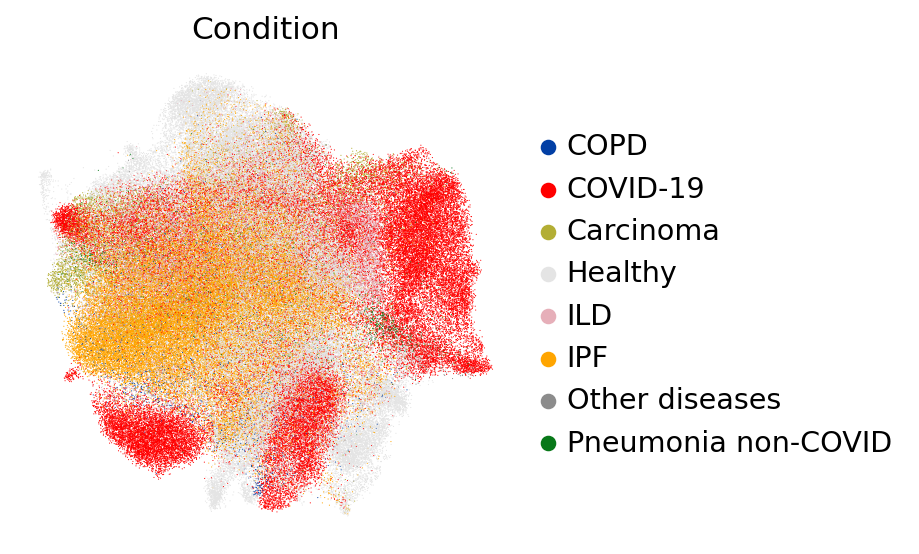

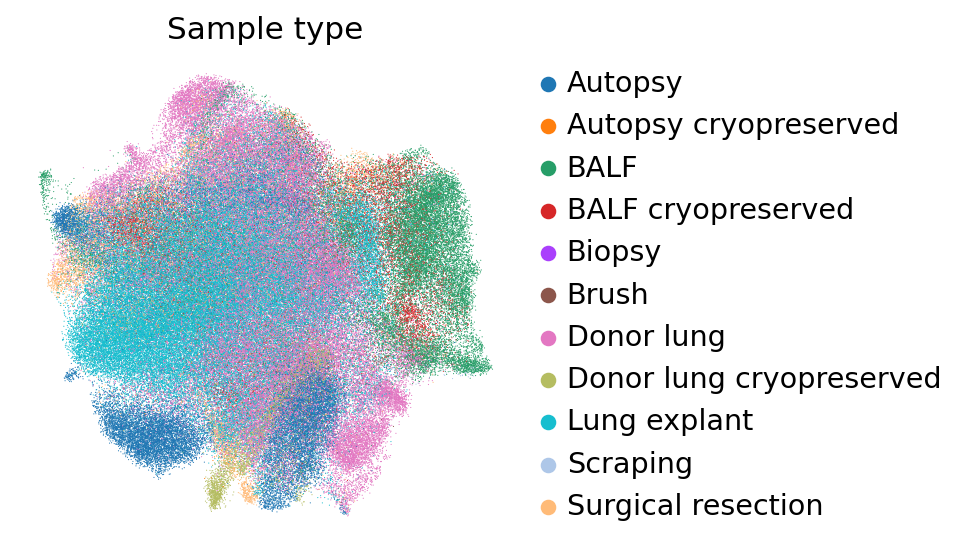

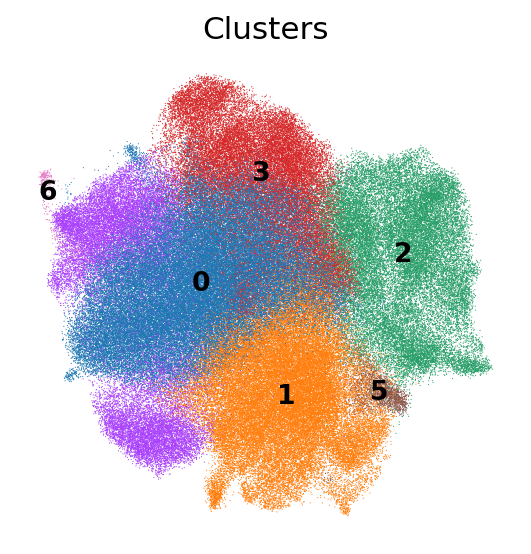

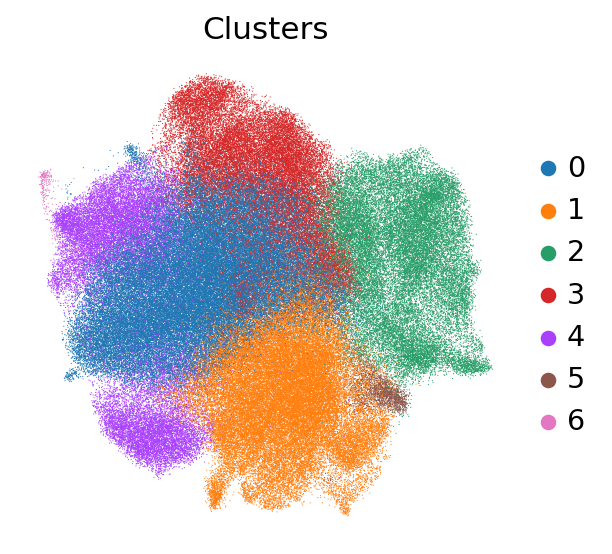

In [84]:
temp = obs_columns + cluster_columns
for i in temp:
    ax = sc.pl.umap(
        adata_comb,
        color=i,
        size=1,
        frameon=False,
        wspace=0.6,
        title=make_title(re.sub("leiden.*", "Clusters", i).replace("_merged", "")),
        legend_loc="right margin" if not i == "leiden_0.3_x4" else "on data",
        return_fig=True,
    )
    fname_file = str(sc.settings.figdir) + "/umap_ob_" + i + ".png"
    print(f"Saving to: {fname_file}")
    plt.savefig(
        fname=fname_file,
        bbox_inches="tight",
        transparent=True,
    )

#### Global context

In [63]:
path_celltype_colors = "../../../../HLCA_reproducibility/supporting_files/celltype_structure_and_colors/manual_anns_grouped_order_and_colors.csv"
fname_file = str(sc.settings.figdir) + "/7e_umap_full_mdms.png"
fname_file

'figures/multi-disease_MdM_full/7e_umap_full_mdms.png'

In [64]:
celltype_colors = pd.read_csv(path_celltype_colors, index_col=0)
emb_full = sc.read_h5ad(
    "../../../data/HLCA_extended/HLCA_extended/HLCA_extended_scarches_emb.h5ad"
)

In [64]:
emb_full.obs["mdms"] = "Other"
emb_full.obs.loc[adata_comb.obs.index, "mdms"] = "Monocyte-derived macrophages"

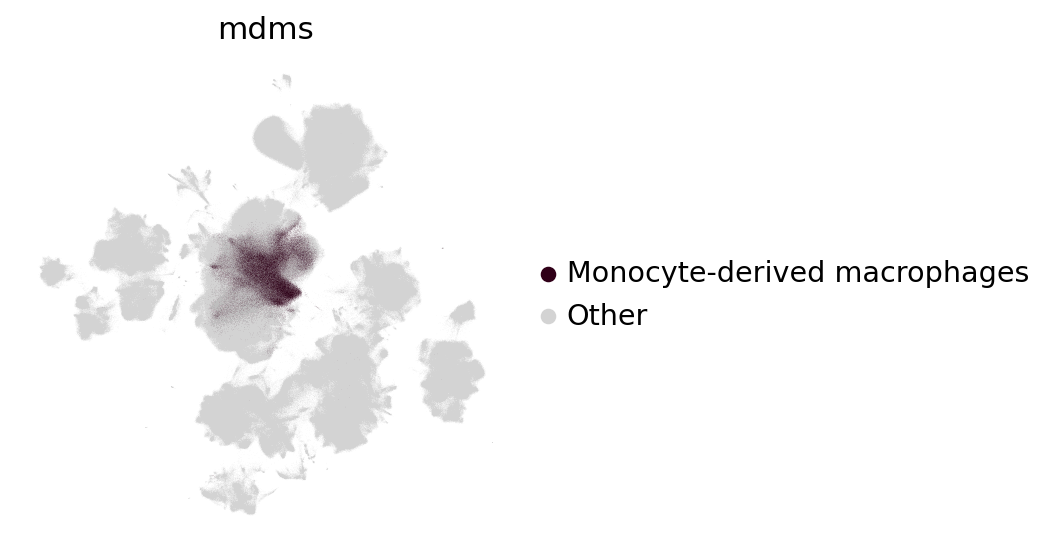

In [68]:
umap_full_mdms = sc.pl.umap(
    emb_full,
    color="mdms",
    palette={
        "Other": "lightgrey",
        "Monocyte-derived macrophages": celltype_colors.loc[
            "Monocyte-derived Mph", "color"
        ],
    },
    frameon=False,
    return_fig=True,
)
umap_full_mdms.savefig(
    fname=fname_file,
    bbox_inches="tight",
    transparent=True,
)

Checking for confounders and bias

In [37]:
sc.set_figure_params(figsize=(10, 4))

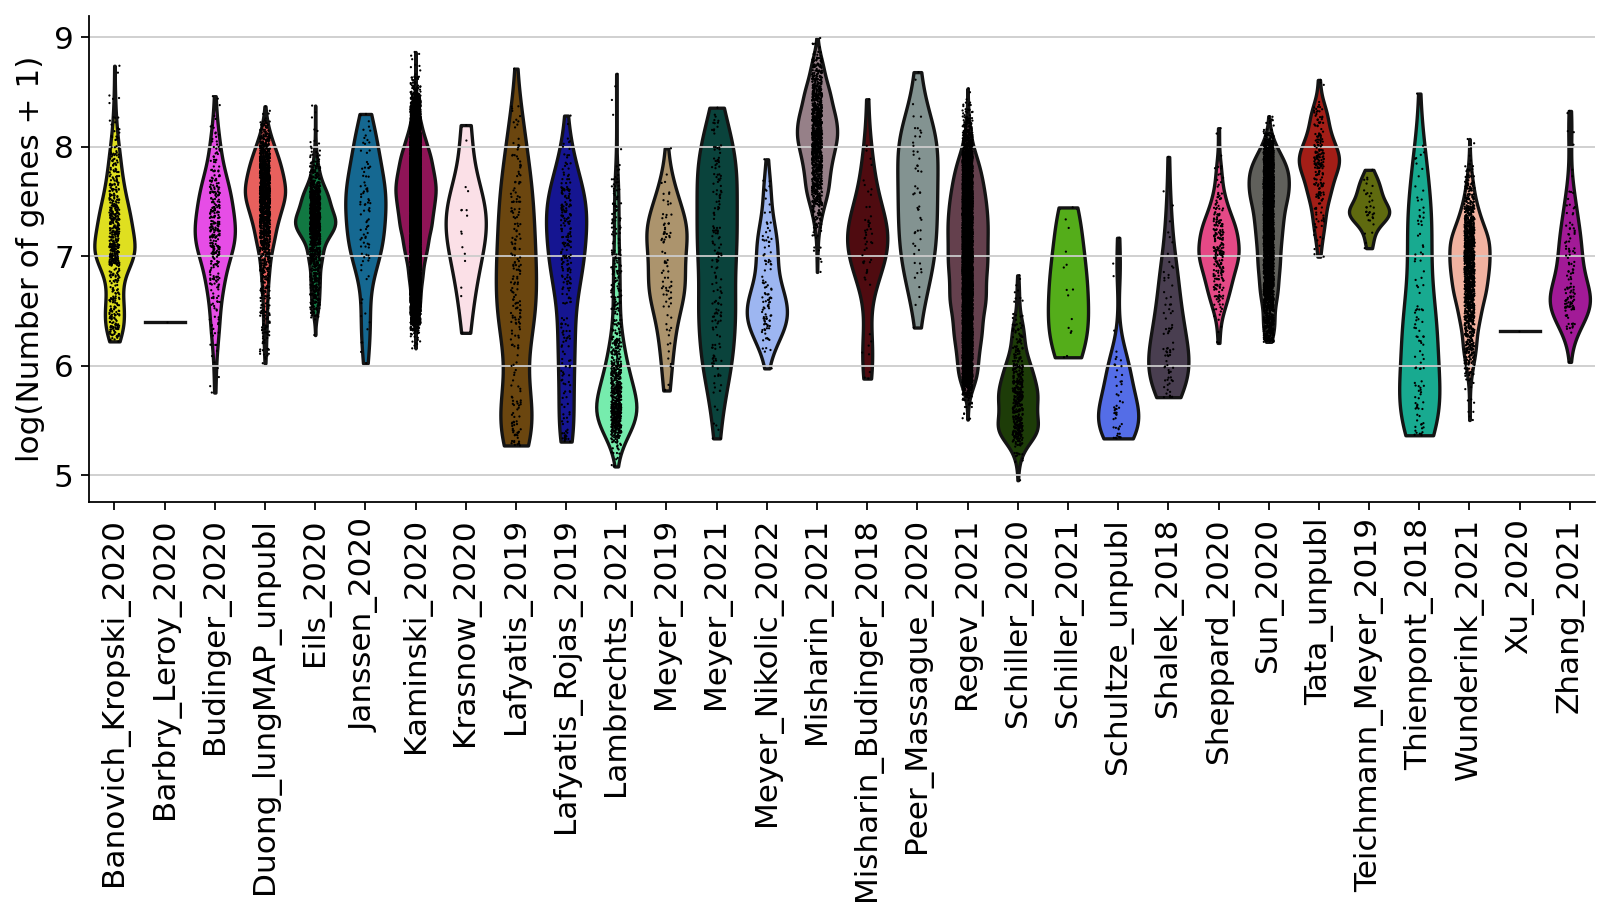

In [42]:
sc.pl.violin(
    adata_comb[adata_comb.obs["leiden_0.3"] == "1", :],
    keys=["log1p_n_features_by_cts"],
    groupby="study",
    rotation=90,
    ylabel="log(Number of genes + 1)",
)

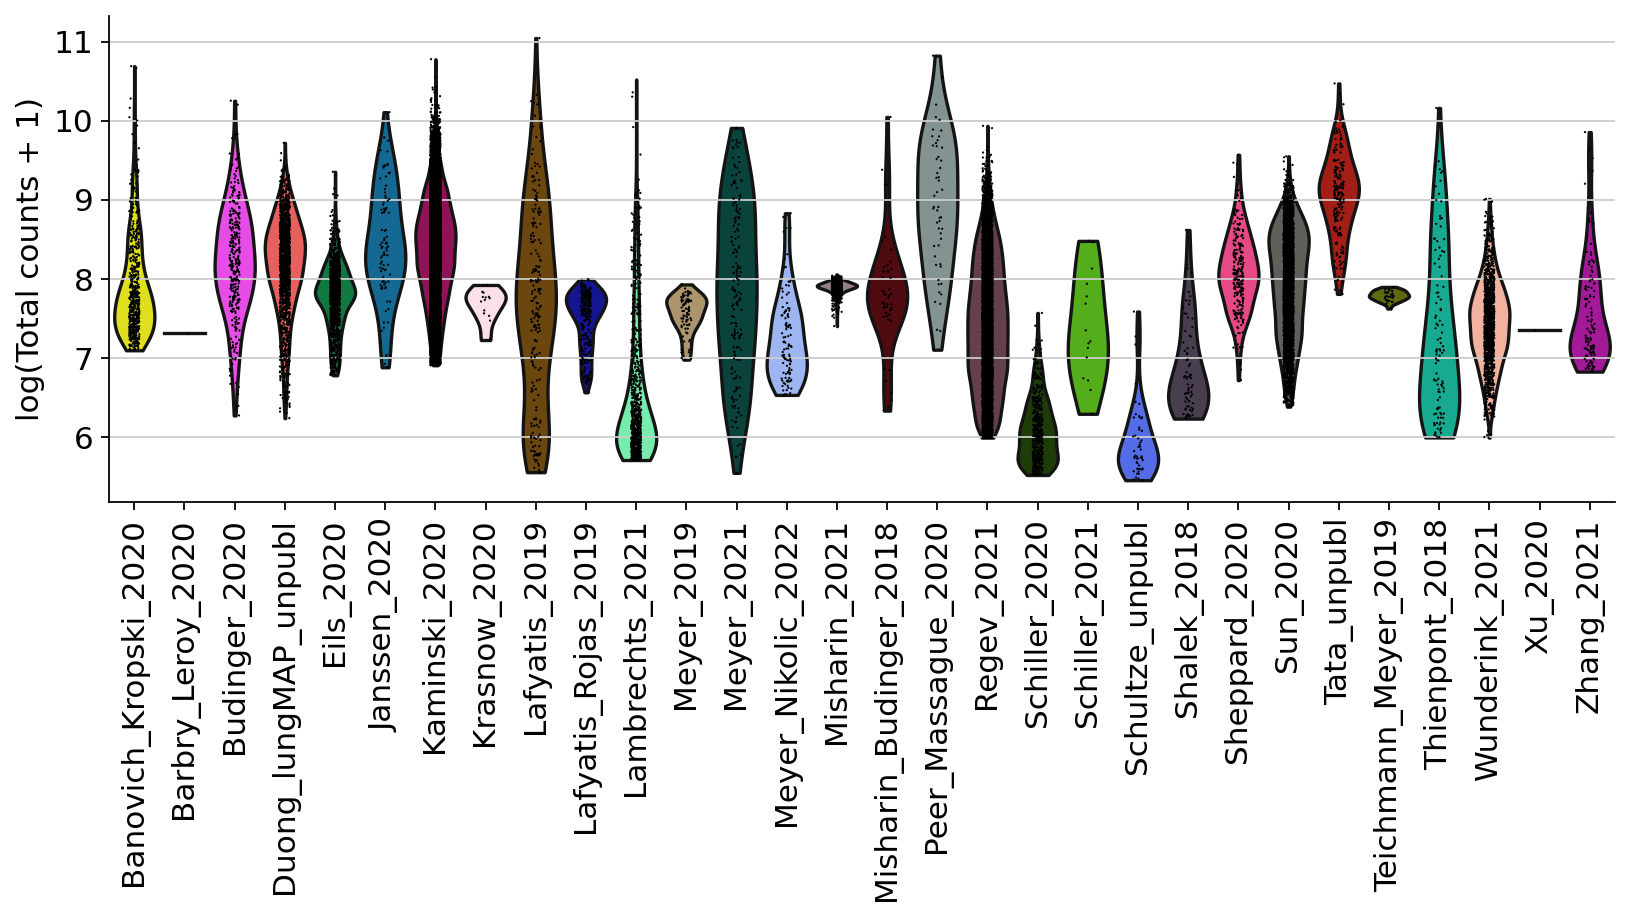

In [43]:
sc.pl.violin(
    adata_comb[adata_comb.obs["leiden_0.3"] == "1", :],
    keys=["log1p_total_cts"],
    groupby="study",
    rotation=90,
    ylabel="log(Total counts + 1)",
)

In [ ]:
sc.set_figure_params(figsize=(4, 4))

In [73]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "last_expr"

In [52]:
order_clusters = {i: [] for i in axis_xs}
axis_ys = [
    "condition_merged",
    "study",
    "condition_covid",
    "condition_study_covid",
    "condition_study_ipf",
    "sample_type",
]

figures/multi-disease_MdM_full/barplot_leiden_0.3-sample_type.png


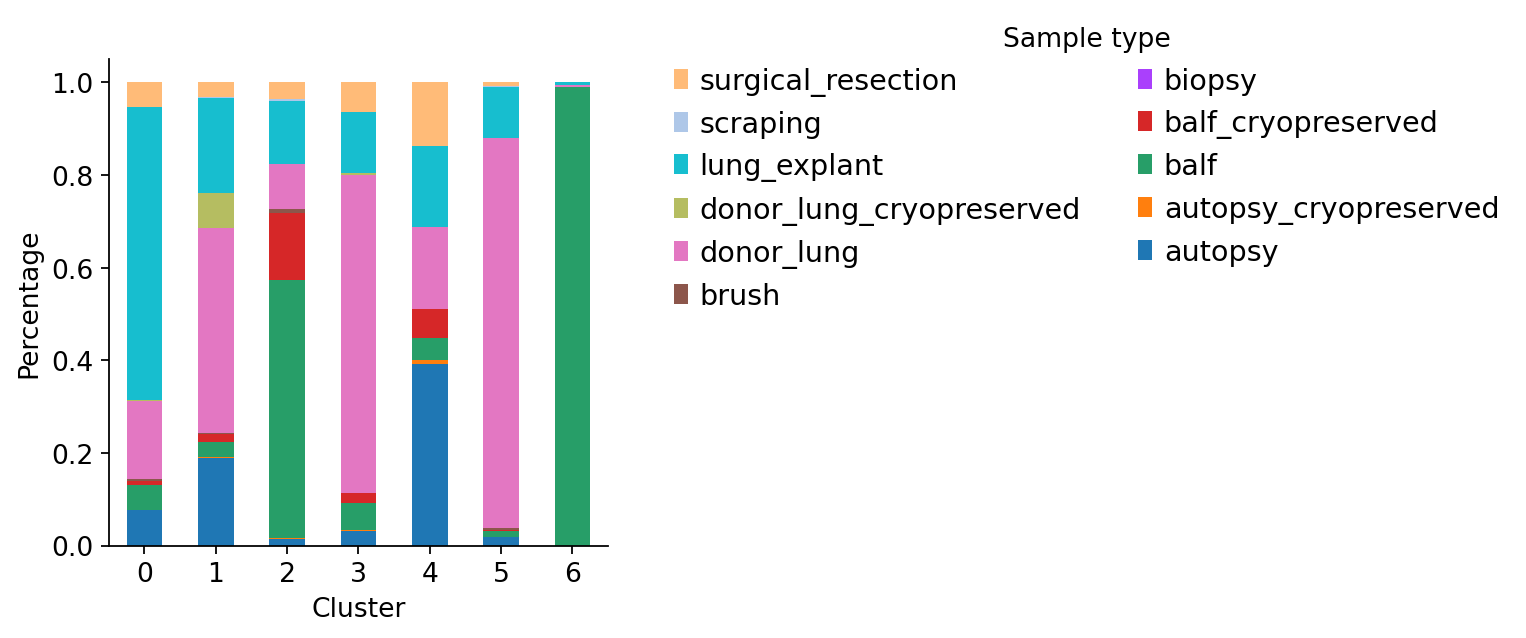

In [54]:
for i in axis_xs:
    for j in axis_ys:
        fname_file = str(sc.settings.figdir) + "/barplot_" + i + "-" + j + ".png"
        print(fname_file)
        df = adata_comb.obs.copy()
        df_plot = pd.crosstab(df[i], df[j], normalize="index")
        # if len(order_clusters[i]) == 0:
        #     order_clusters[i].extend(
        #         df_plot.loc[:, "Healthy"].sort_values(ascending=False).index.tolist()
        #     )
        ax = df_plot.plot(  # .loc[order_clusters[i], :]
            kind="bar", stacked=True, legend=False, color=condition_colors[j]
        )

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(
            handles[::-1],
            labels[::-1],
            bbox_to_anchor=(1.08, 1.12, 0, 0),
            ncol=2,
            frameon=False,
            title=make_title(j),
        )
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        plt.ylabel(make_title("percentage"))
        plt.xlabel(make_title("cluster"))
        plt.xticks(rotation=0)

        plt.savefig(
            fname=fname_file,
            bbox_inches="tight",
            transparent=True,
        )
        plt.show()
        if "condition" in j:
            if "study" in j:
                colby = j
            else:
                colby = "study"
            df_pct = pd.crosstab(df[i], df["condition_merged"], normalize="index") > 0.1
            df_sig_columns = df_pct.loc[
                :, [any(df_pct[i]) for i in df_pct.columns]
            ].columns.tolist()
            for sig_condition in df_sig_columns:
                fname_file = (
                    str(sc.settings.figdir)
                    + "/barplot_"
                    + i
                    + "-"
                    + j
                    + "_"
                    + sig_condition
                    + ".png"
                )
                print(fname_file)
                df_sig = df.loc[df["condition_merged"].isin([sig_condition]), :]
                df_sig_plot = pd.crosstab(df_sig[i], df_sig[colby], normalize="index")
                # .loc[
                #     [k for k in order_clusters[i] if k in df_sig_plot.index], :
                # ]
                ax = df_sig_plot.plot(
                    kind="bar",
                    stacked=True,
                    legend=False,
                    color=condition_colors[colby],
                )

                handles, labels = ax.get_legend_handles_labels()
                ax.legend(
                    handles[::-1],
                    labels[::-1],
                    bbox_to_anchor=(1.08, 1.12, 0, 0),
                    ncol=2,
                    frameon=False,
                    title="Study",
                )
                ax.spines["right"].set_visible(False)
                ax.spines["top"].set_visible(False)
                plt.xlabel("Cluster")
                plt.ylabel("Percentage")
                plt.xticks(rotation=0)

                plt.savefig(
                    fname=fname_file,
                    bbox_inches="tight",
                    transparent=True,
                )
                plt.show()

figures/multi-disease_MdM_full/barplot_leiden_0.3-condition_merged_abs.png


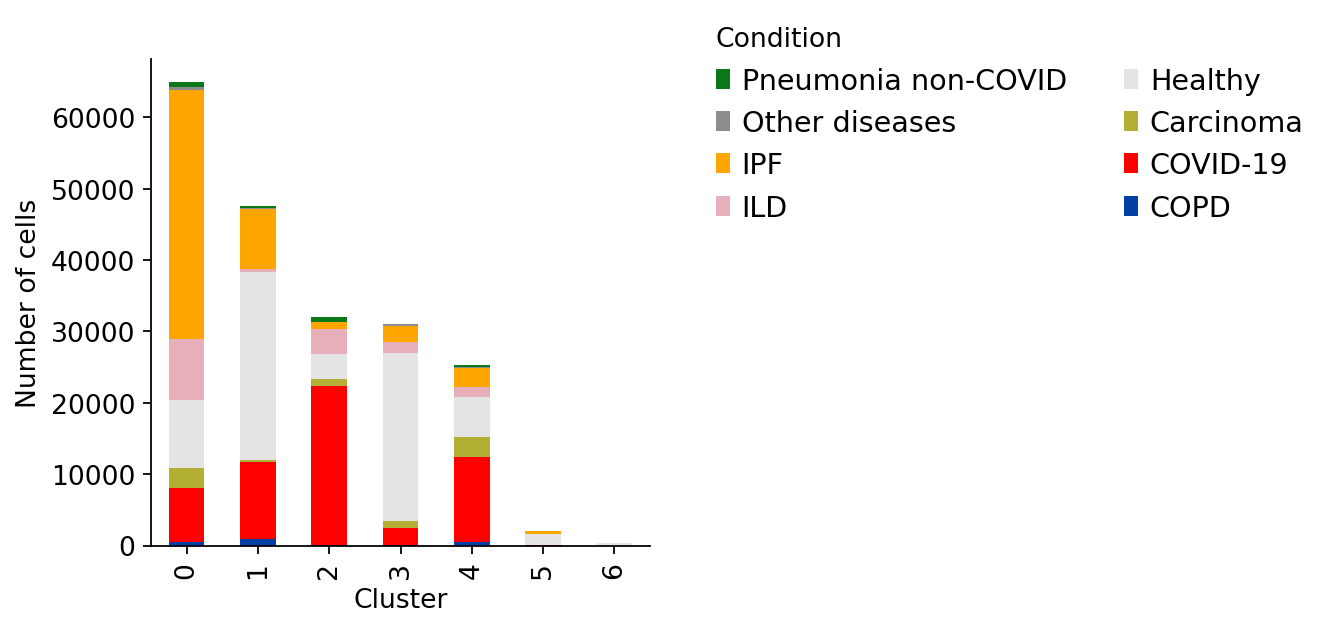

figures/multi-disease_MdM_full/barplot_leiden_0.3-condition_covid_abs.png


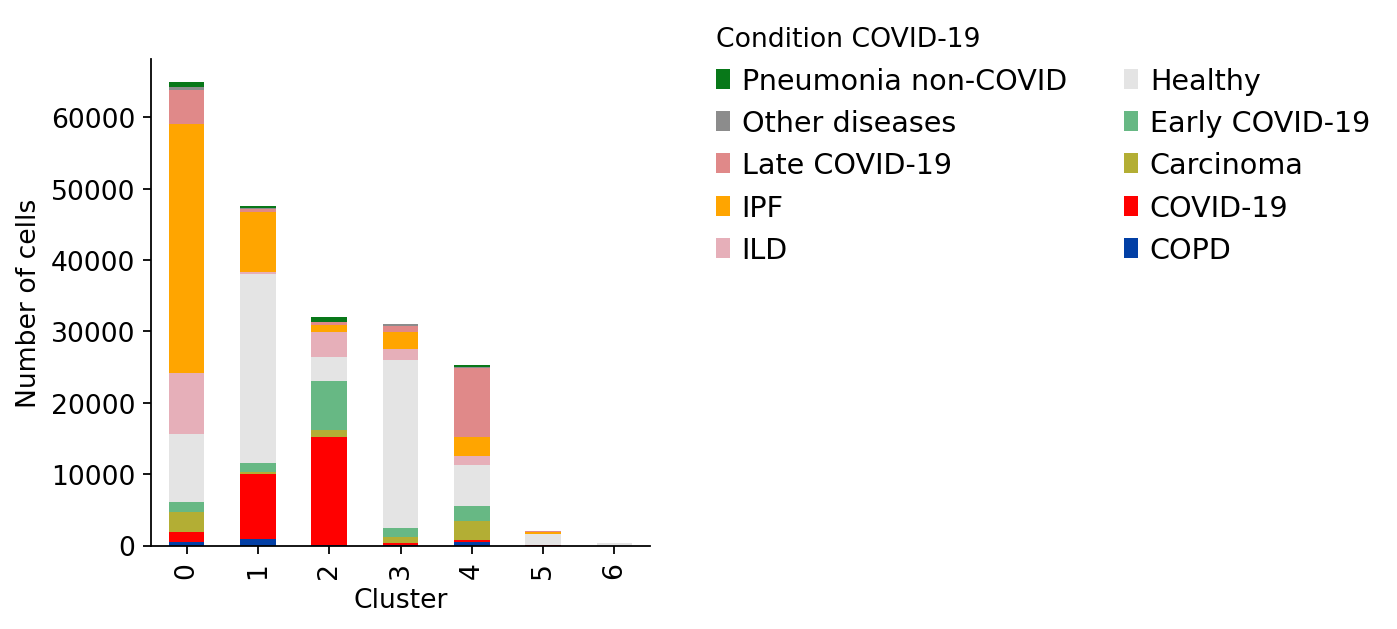

figures/multi-disease_MdM_full/barplot_leiden_0.3-condition_study_covid_abs.png


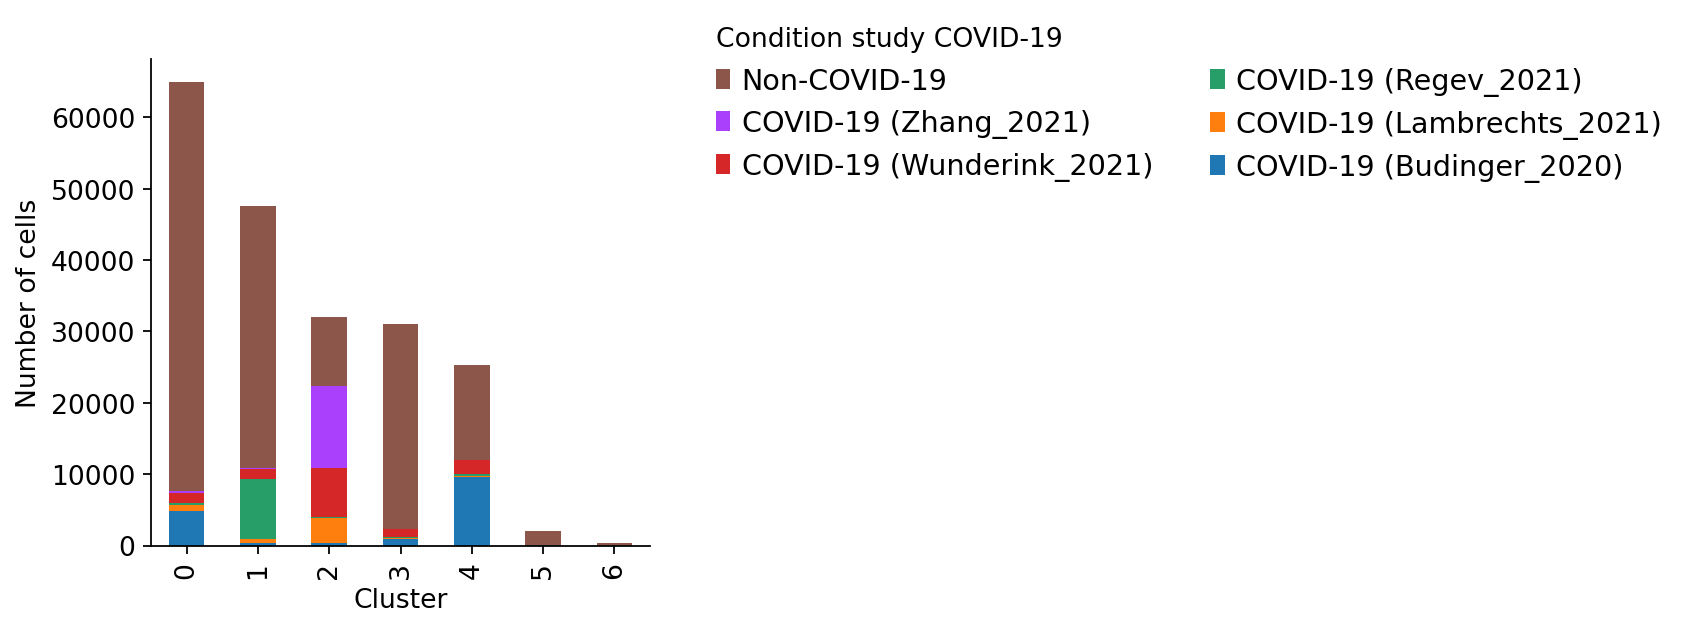

figures/multi-disease_MdM_full/barplot_leiden_0.3-study_abs.png


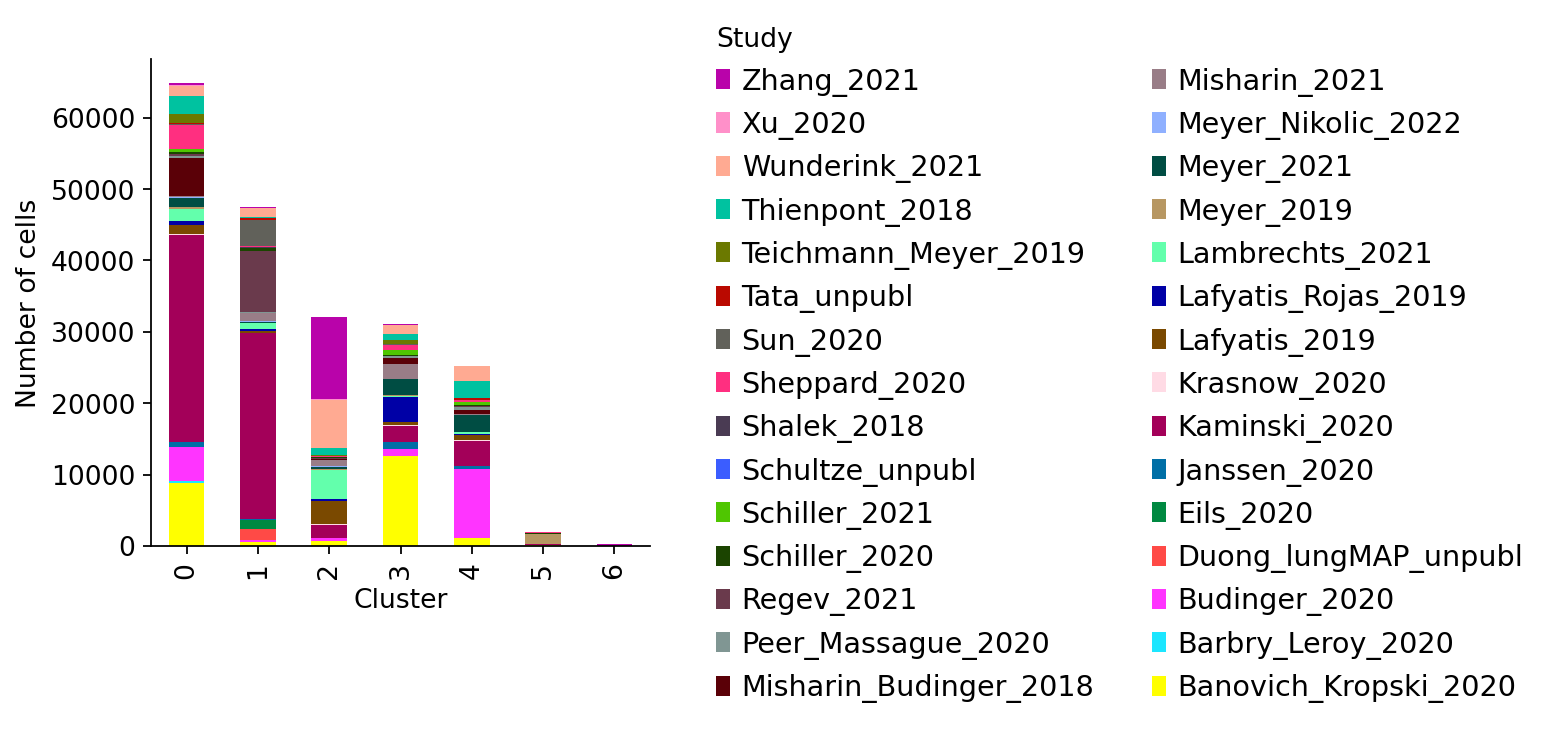

figures/multi-disease_MdM_full/barplot_leiden_0.3-sample_type_abs.png


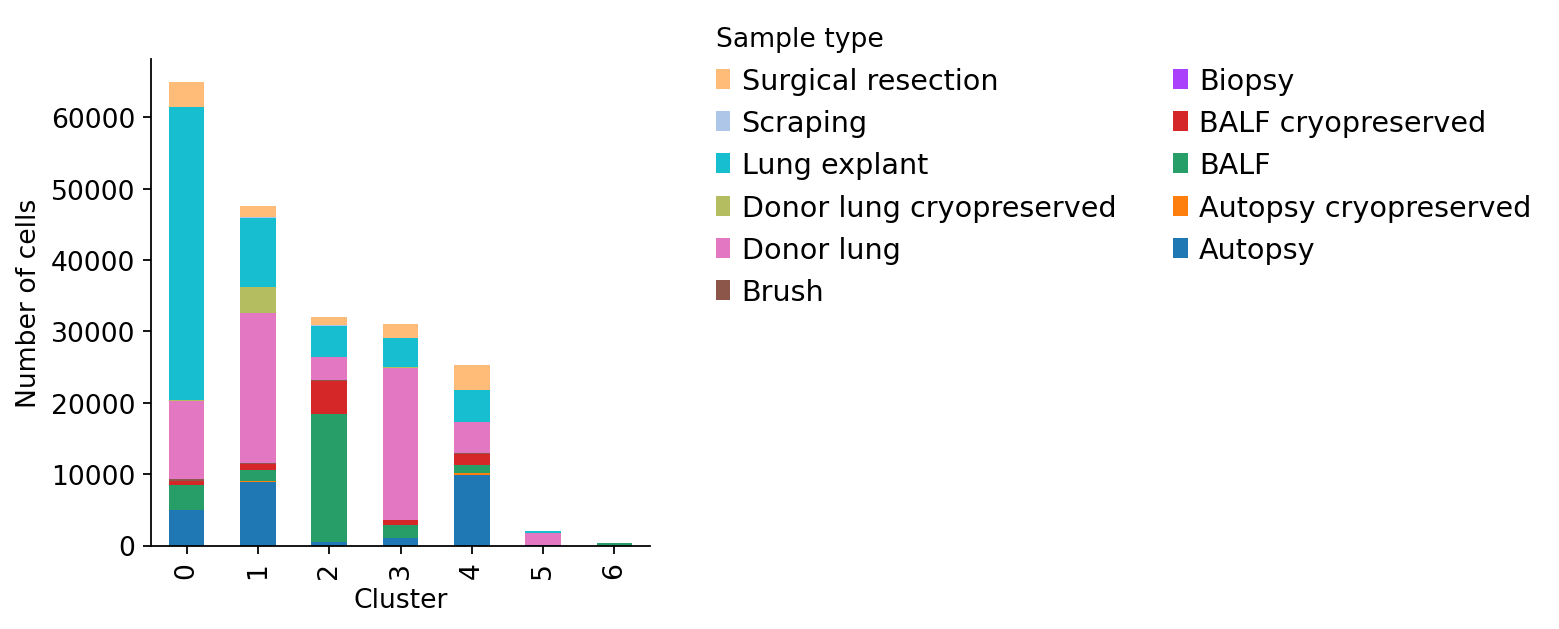

In [81]:
i = "leiden_0.3"
temp = [
    "condition_merged",
    "condition_covid",
    "condition_study_covid",
    "study",
    "sample_type",
]
# i = "condition_merged"
# temp = ["sample_type"]
for j in temp:
    fname_file = str(sc.settings.figdir) + "/barplot_" + i + "-" + j + "_abs.png"
    print(fname_file)
    df = adata_comb.obs.copy()
    df_plot = pd.crosstab(df[i], df[j])
    ax = df_plot.plot(kind="bar", stacked=True, legend=False, color=condition_colors[j])

    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(
        handles[::-1],
        labels[::-1],
        bbox_to_anchor=(1.08, 1.12, 0, 0),
        ncol=2,
        frameon=False,
        title=make_title(j.replace("_merged", "")),
    )
    leg._legend_box.align = "left"
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.xlabel("Cluster")
    plt.ylabel("Number of cells")
    plt.xticks(rotation=90)

    plt.savefig(
        fname=fname_file,
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Saving to: figures/multi-disease_MdM_full/barplot_leiden_0.3-condition_study_covid_COVID-19_abs.png


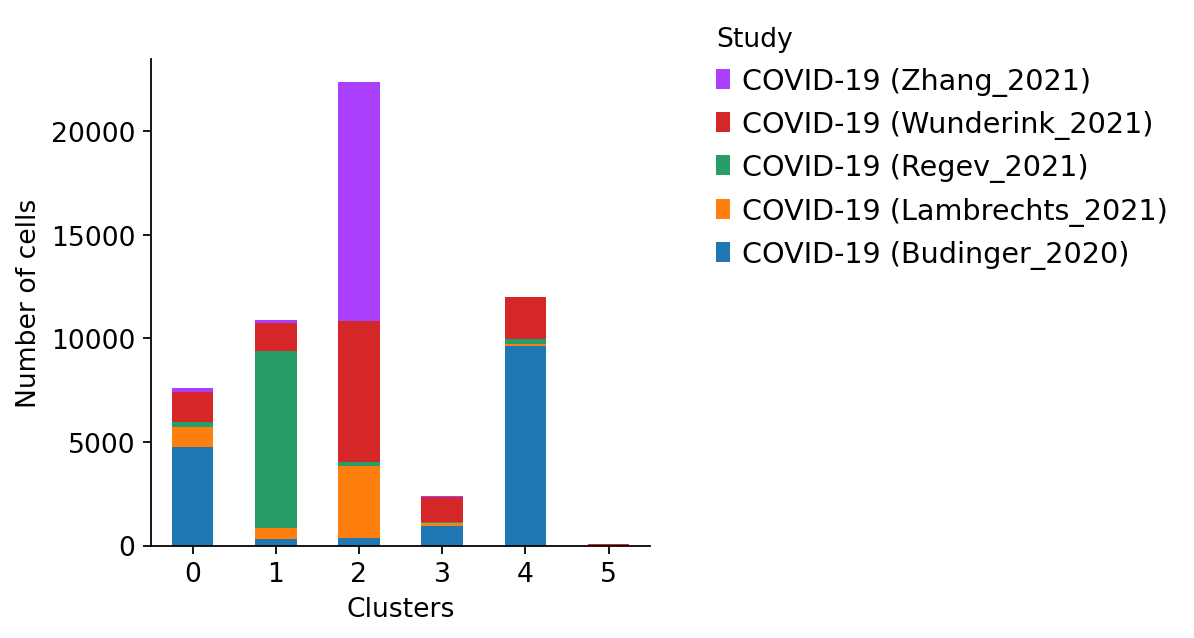

Saving to: figures/multi-disease_MdM_full/barplot_leiden_0.3-condition_study_ipf_IPF_abs.png


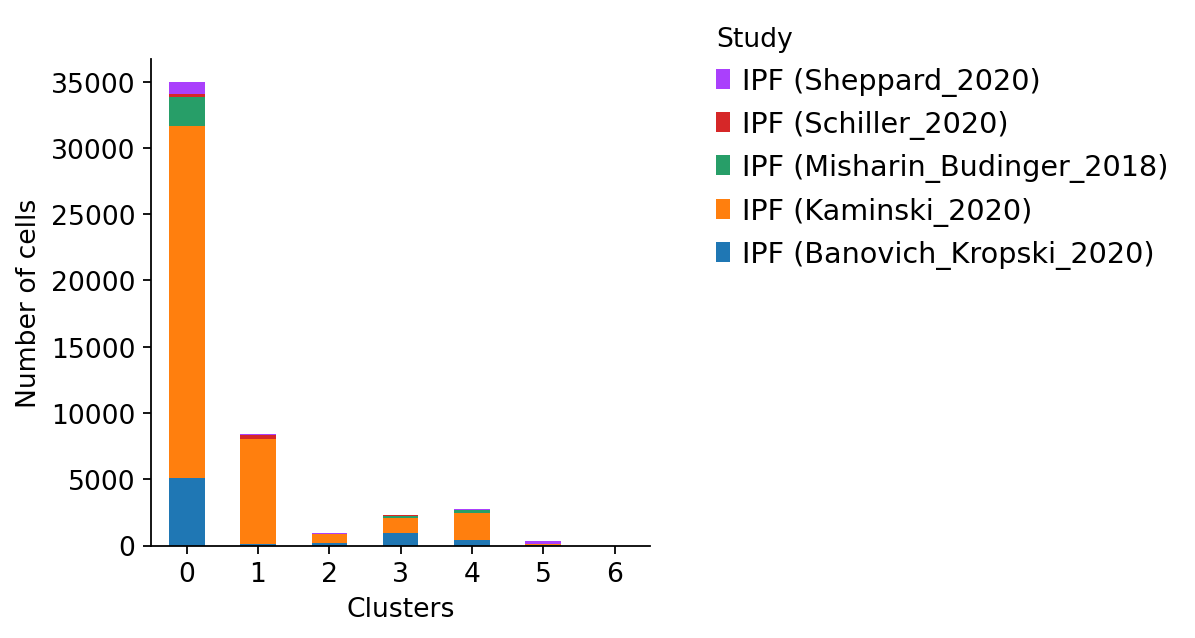

In [76]:
for i in ["leiden_0.3"]:
    for j in ["condition_study_covid", "condition_study_ipf"]:
        df = adata_comb.obs.copy()
        if j == "condition_study_covid":
            sig_condition = "COVID-19"
        else:
            sig_condition = "IPF"
        fname_file = (
            str(sc.settings.figdir)
            + "/barplot_"
            + i
            + "-"
            + j
            + "_"
            + sig_condition
            + "_abs.png"
        )
        df_sig = df.loc[df["condition_merged"].isin([sig_condition]), :]
        # if df_sig.shape[0] == 0:
        #     continue
        print(f"Saving to: {fname_file}")
        df_sig_plot = pd.crosstab(df_sig[i], df_sig[j])
        ax = df_sig_plot.plot(
            kind="bar",
            stacked=True,
            legend=False,
            color=condition_colors[j],
        )

        handles, labels = ax.get_legend_handles_labels()
        leg = ax.legend(
            handles[::-1],
            labels[::-1],
            bbox_to_anchor=(1.08, 1.12, 0, 0),
            ncol=1,
            frameon=False,
            title="Study",
        )
        leg._legend_box.align = "left"
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        plt.xlabel("Clusters")
        plt.ylabel("Number of cells")
        plt.xticks(rotation=0)

        plt.savefig(
            fname=fname_file,
            bbox_inches="tight",
            transparent=True,
        )
        plt.show()

Saving to: figures/multi-disease_MdM_full/barplot_leiden_0.3-sample_type_COVID-19_abs.png


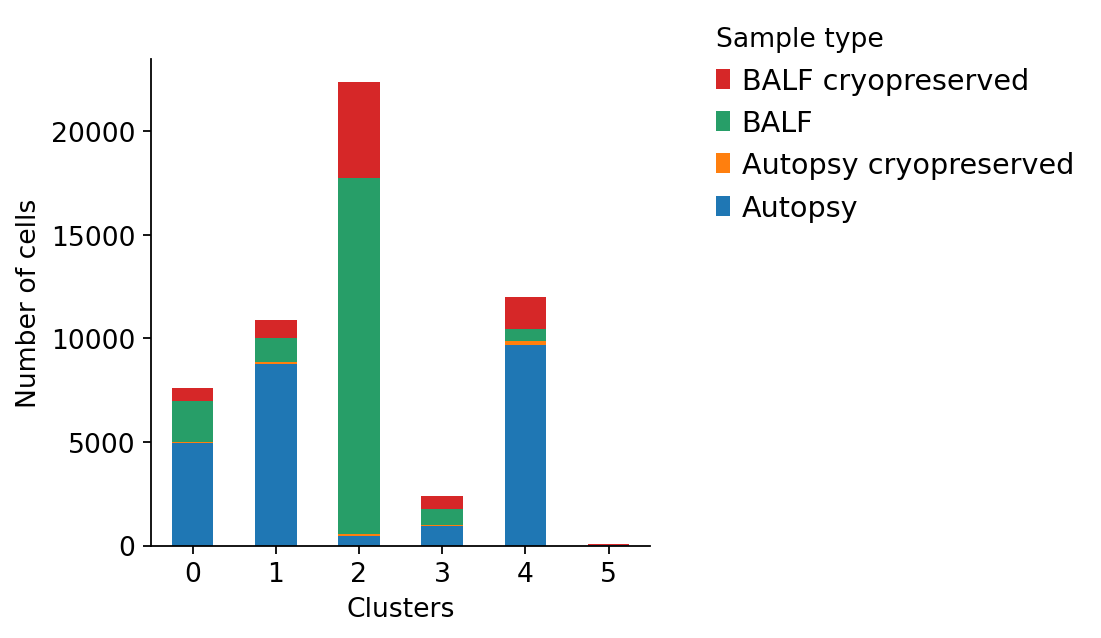

Saving to: figures/multi-disease_MdM_full/barplot_leiden_0.3-sample_type_IPF_abs.png


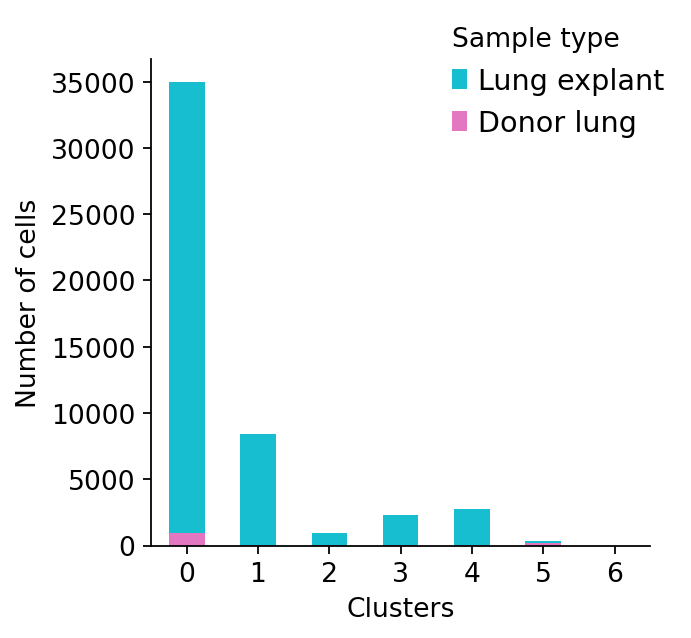

In [79]:
pct = False
for i in ["leiden_0.3"]:
    for j in ["sample_type"]:
        df = adata_comb.obs.copy()
        for sig_condition in ["COVID-19", "IPF"]:
            fname_end = ".png" if pct else "_abs.png"
            fname_file = (
                str(sc.settings.figdir)
                + "/barplot_"
                + i
                + "-"
                + j
                + "_"
                + sig_condition
                + fname_end
            )
            df_sig = df.loc[df["condition_merged"].isin([sig_condition]), :]
            if df_sig.shape[0] == 0:
                continue
            print(f"Saving to: {fname_file}")
            df_sig_plot = pd.crosstab(
                df_sig[i], df_sig[j], normalize="index" if pct else False
            )
            ax = df_sig_plot.plot(
                kind="bar",
                stacked=True,
                legend=False,
                color=condition_colors[j],
            )

            handles, labels = ax.get_legend_handles_labels()
            leg = ax.legend(
                handles[::-1],
                labels[::-1],
                bbox_to_anchor=(1.08, 1.12, 0, 0),
                ncol=1,
                frameon=False,
                title=make_title(j),
            )
            leg._legend_box.align = "left"
            ax.spines["right"].set_visible(False)
            ax.spines["top"].set_visible(False)
            plt.xlabel("Clusters")
            plt.ylabel("Percentage" if pct else "Number of cells")
            plt.xticks(rotation=0)

            plt.savefig(
                fname=fname_file,
                bbox_inches="tight",
                transparent=True,
            )
            plt.show()

In [92]:
df = pd.crosstab(adata_comb.obs["sample"], adata_comb.obs["leiden_0.3"])
df["sample"] = df.index.tolist()
df = df.melt(id_vars=["sample"])
df = df.loc[df["value"].astype(int) > 0, :]
df["sample_n"] = df.groupby("leiden_0.3")["value"].transform(len)
df["sample_pct"] = df["value"] / df.groupby("leiden_0.3")["value"].transform("sum")
df = df.loc[df["sample_pct"].astype(int) > 0.01, :]
df = df.sort_values(by="sample_n")

In [96]:
pd.set_option("display.max_rows", 40)
df.iloc[:30, :]

sample leiden_0.3  value  sample_n  sample_pct
3990      WSSS8123931          6      1         9    0.003257
3843              PX5          6      2         9    0.006515
3839              PX1          6      1         9    0.003257
3777              HC3          6      7         9    0.022801
3776              HC2          6    263         9    0.856678
3775              HC1          6     30         9    0.097720
3571            235CO          6      1         9    0.003257
3533           158I-b          6      1         9    0.003257
3846              PX8          6      1         9    0.003257
3057           BAL021          5      2       121    0.001001
3050           BAL014          5      2       121    0.001001
3045           BAL009          5      1       121    0.000501
3043           BAL002          5      1       121    0.000501
3038          7239220          5      1       121    0.000501
3006             388C          5      1       121    0.000501
3020  5841STDY7991477          5      1       121    0.000501
3011             396C          5      1       121    0.000501
3009         390C_24h          5      1       121    0.000501
3058           BAL022          5      2       121    0.001001
3005         368C_72h          5    166       121    0.083083
3037          7239219          5      1       121    0.000501
3060           BAL024          5      4       121    0.002002
3068           BAL032          5      1       121    0.000501
3063           BAL027          5      3       121    0.001502
3067           BAL031          5      1       121    0.000501
3004         368C_24h          5    416       121    0.208208
3070           BAL035          5      2       121    0.001001
3072           BAL037          5      2       121    0.001001
3073           BAL038          5      1       121    0.000501
3091           BT1293          5      2       121    0.001001

In [68]:
df = adata_comb.obs.copy()
df_sig = df.loc[df["condition_merged"].isin(["IPF"]), :]
df_sig = df_sig.loc[df_sig["leiden_0.3"].isin(["5"]), :]
tvar = pd.crosstab(df_sig["sample"], df_sig["sample_type"])
temp = df_sig["sample"].value_counts()
tvar.loc[temp[temp > 0].index, :]

sample_type  donor_lung  lung_explant
sample                               
IPF3_All            164             0
TILD001               0            31
TILD015               0            15
063I-b                0            11
VUILD59               0             9
210CO                 0             7
051I-a                0             7
228I-a                0             6
VUILD53               0             6
TILD006               0             6
034I-a                0             3
209I-a                0             3
IPF2_All              3             0
225I-a                0             2
123I                  0             2
040I-b                0             2
212I-a                0             2
VUILD65               0             1
IPF_03                0             1
145I-a                0             1
138I-a                0             1
051I                  0             1
TILD028               0             1
228I-b                0             1
010I                  0             1
166I-a                0             1
135I-a                0             1

In [68]:
InteractiveShell.ast_node_interactivity = "all"

Now looking at uncertainty

In [51]:
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True

Saving to: figures/multi-disease_MdM_full/dotplot_uncertainty_leiden_0.3.png
Saving to: figures/multi-disease_MdM_full/dotplot_uncertainty_leiden_0.5.png


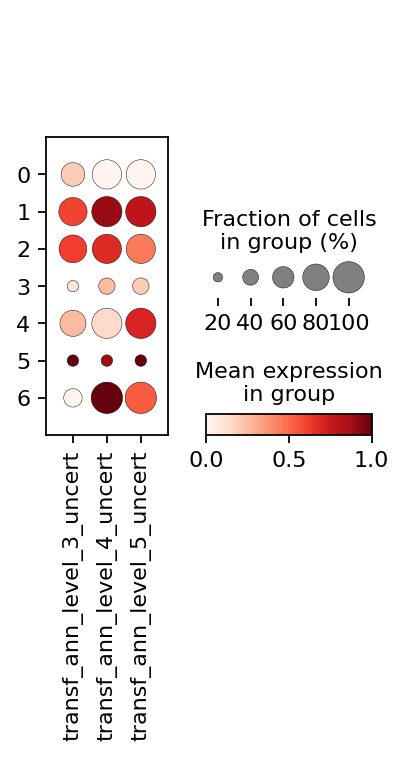

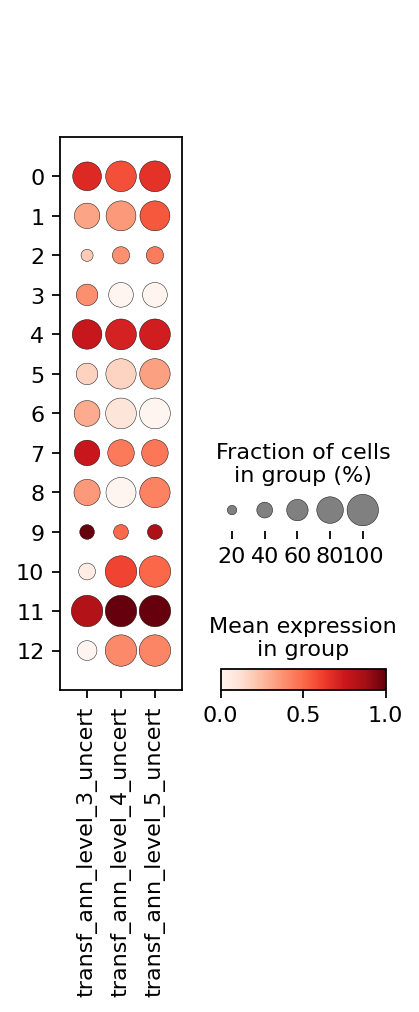

In [106]:
markers_temp = [
    "transf_ann_level_3_uncert",
    "transf_ann_level_4_uncert",
    "transf_ann_level_5_uncert",
]
dotplots_dict = {}
for c2plot in axis_xs:
    fname_file = str(sc.settings.figdir) + "/dotplot_uncertainty_" + c2plot + ".png"
    dotplots_dict[fname_file] = sc.pl.dotplot(
        adata_comb,
        markers_temp,
        groupby=c2plot,
        standard_scale="var",
        # save=temp,
        return_fig=True,
    )
    print(f"Saving to: {fname_file}")
    dotplots_dict[fname_file].savefig(
        filename=fname_file,
        bbox_inches="tight",
        transparent=True,
    )

Marker discovery

In [52]:
%%time
for i in axis_xs:
    print(f"\033[1;34m********************\033[0m {i}", end=" ")
    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    fname = str(sc.settings.figdir) + "/diffexp_" + i
    print(fname)
    if not os.path.isfile(fname + ".pickle"):
        print("Running scanpy.tl.rank_genes_groups")
        if not "rank_genes_" + i in adata_comb.uns.keys():
            sc.tl.rank_genes_groups(
                adata_comb, groupby=i, key_added="rank_genes_" + i, method="wilcoxon"
            )
        a = adata_comb.uns["rank_genes_" + i]
        with open(fname + ".pickle", 'wb') as handle:
            pickle.dump(a, handle)
        dedf = sc.get.rank_genes_groups_df(adata_comb, group=None, key="rank_genes_" + i)
        print(f"Saving to: {fname}")
        dedf.to_csv(fname + ".csv")
    else:
        print("Reloading results")
        with open(fname + ".pickle", 'rb') as handle:
            b = pickle.load(handle)
        adata_comb.uns["rank_genes_" + i] = b
        dedf = pd.read_csv(fname + ".csv")
    print(dedf.iloc[:3, :])

******************** leiden_0.3 2022-11-02 11:59:01
figures/multi-disease_MdM_full/diffexp_leiden_0.3
Reloading results
   Unnamed: 0  group   names     scores  logfoldchanges  pvals  pvals_adj
0           0      0  TMSB4X  155.68480        1.389285    0.0        0.0
1           1      0    CSTB  155.59787        1.271492    0.0        0.0
2           2      0     CD9  154.59766        1.591034    0.0        0.0
CPU times: user 353 ms, sys: 25.3 ms, total: 378 ms
Wall time: 380 ms


In [78]:
%%time
de_dict_summary = {}
for i in axis_xs:
    print(f"\033[1;34m********************\033[0m {i}", end=" ")
    dedf = sc.get.rank_genes_groups_df(adata_comb, group=None, key="rank_genes_" + i)
    genes = list(set(dedf.loc[dedf["logfoldchanges"] > 0, "names"]))
    res = pd.DataFrame(columns=genes, index=adata_comb.obs[i].cat.categories)                                                                                                 
    for clust in adata_comb.obs[i].cat.categories:
        print(".", end="")
        temp = adata_comb[adata_comb.obs[i].isin([clust]), genes].X > 0
        res.loc[clust] = (temp.mean(0) * 100).round(1)
        # for j in res.columns:
        #     res.loc[clust,j] = (adata_comb[adata_comb.obs[i].isin([clust]),:][:,j].X > 0).mean(0)
    res = res.T
    res.columns = ["PCT_" + j for j in res.columns]
    de_dict_summary[i] = res
    print(" done!")
    print(res.iloc[:10, :])

******************** leiden_0.3 ....... done!
                  PCT_0 PCT_1 PCT_2 PCT_3 PCT_4 PCT_5 PCT_6
ENSG00000278998.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0
FUT1                0.2   0.3   0.1   0.0   0.1   0.0   0.0
RPL29P7             0.0   0.0   0.0   0.0   0.0   0.0   0.0
MPHOSPH6P1          0.0   0.0   0.0   0.0   0.0   0.0   0.0
GPR20               0.0   0.0   0.0   0.0   0.0   0.0   0.0
ENSG00000251143.1   0.4   0.4   0.3   0.5   0.3   0.0   0.0
OR4N2               0.1   0.2   0.0   0.0   0.0   0.0   0.0
ENSG00000275180.2   0.3   0.1   0.3   0.5   0.6   0.5   0.0
CCDC69             12.3  14.2   8.0  12.4  12.9  13.8   4.2
ENSG00000207151.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0
CPU times: user 33.2 s, sys: 7.54 s, total: 40.7 s
Wall time: 40.2 s


In [79]:
for i in axis_xs:
    print(f"\033[1;34m********************\033[0m {i}")
    dedf = sc.get.rank_genes_groups_df(adata_comb, group=None, key="rank_genes_" + i)
    de_dict_summary[i]["names"] = de_dict_summary[i].index.tolist()
    # Adding to table
    dedf = dedf.loc[dedf["logfoldchanges"] > 0, :]
    dedf = dedf.merge(de_dict_summary[i], on="names")
    dedf["scores_temp"] = dedf["scores"].abs()
    dedf = dedf.sort_values(by=["group", "scores_temp"], ascending=[True, False])
    del dedf["scores_temp"]
    fname = str(sc.settings.figdir) + "/diffexp_" + i + "_filtered_stats"
    print(f"Saving to: {fname}")
    dedf.to_csv(fname + ".csv")

******************** leiden_0.3
Saving to: figures/multi-disease_MdM_full/diffexp_leiden_0.3_filtered_stats


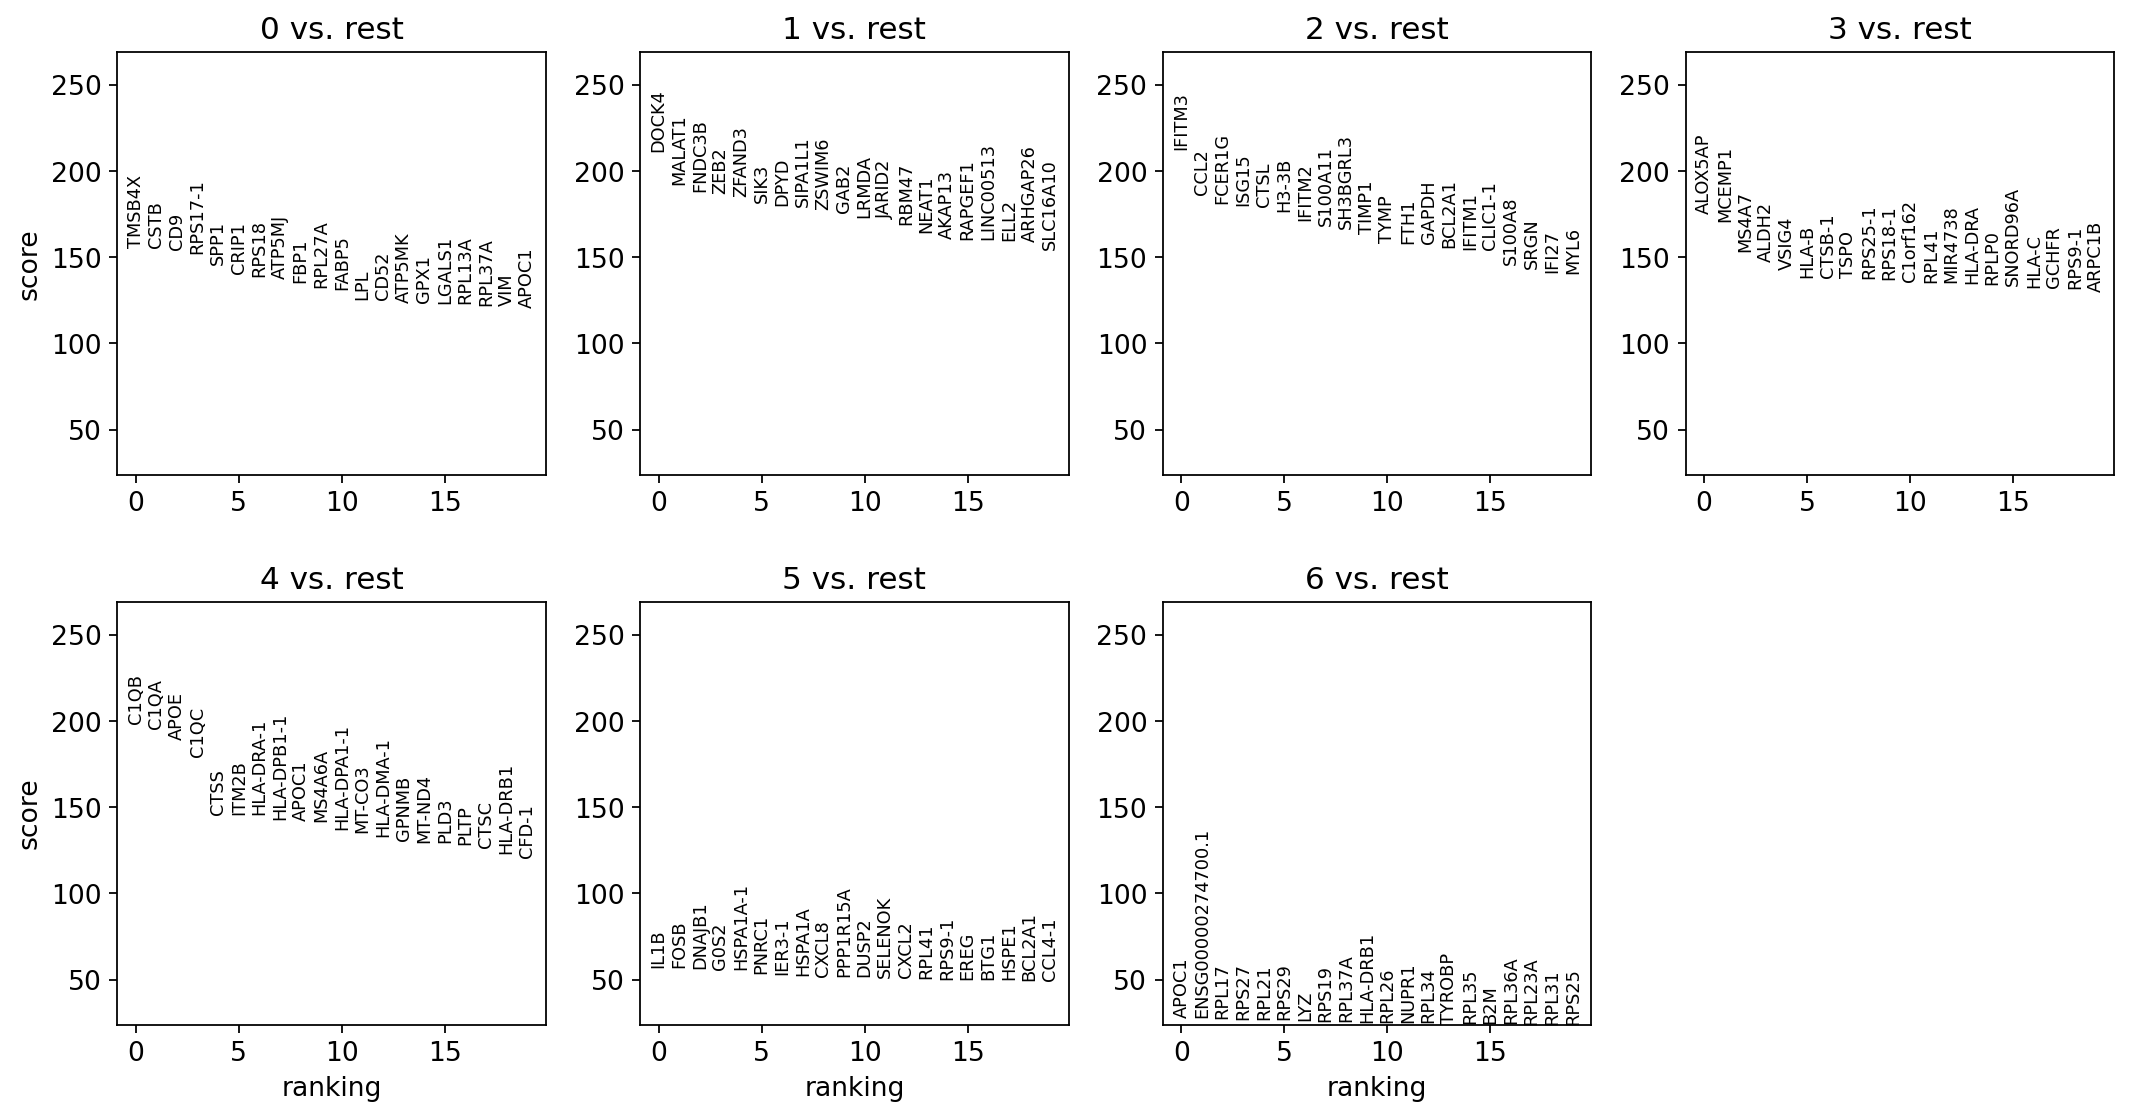

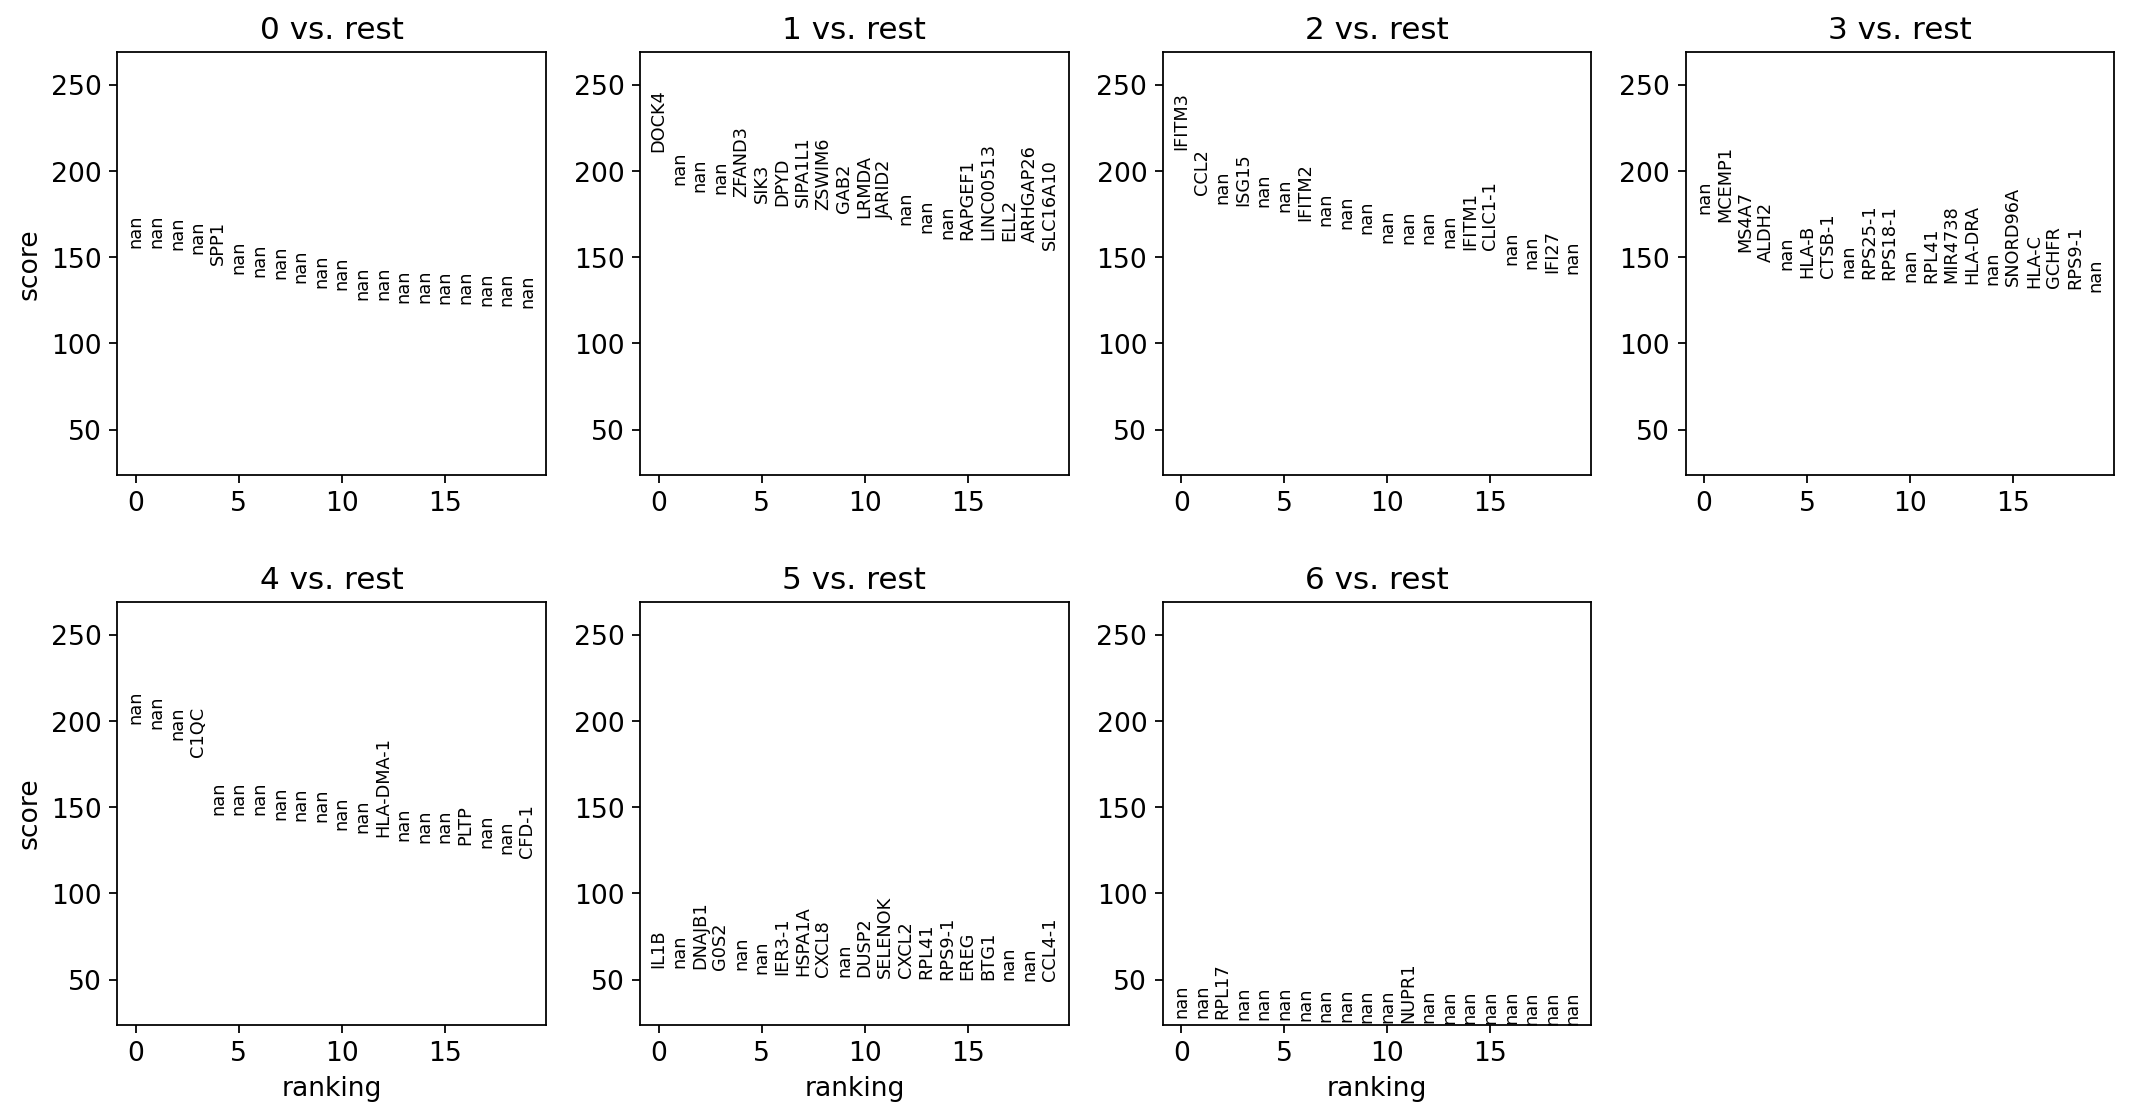

In [80]:
for i in axis_xs:
    sc.tl.filter_rank_genes_groups(
        adata_comb,
        key="rank_genes_" + i,
        key_added="rank_genes_" + i + "_fc2",
        min_fold_change=2,
    )
    sc.pl.rank_genes_groups(
        adata_comb,
        key="rank_genes_" + i,
        save=".png",
    )
    sc.pl.rank_genes_groups(adata_comb, key="rank_genes_" + i + "_fc2", save="_fc2.png")

In [53]:
%%time
minmax = [(0.75, 0.2), (0.65, 0.25), (0.55, 0.3), (0.45, 0.35), (0.4, 0.4)]
minmax = [(0.55, 0.3), (0.45, 0.35), (0.4, 0.4), (0.3, 0.1)]
for minin, maxo in minmax:
    for i in axis_xs:
        print("rank_genes_" + i + "_minin" + str(minin) + "_maxo" + str(maxo))
        sc.tl.filter_rank_genes_groups(
            adata_comb,
            key="rank_genes_" + i,
            key_added="rank_genes_" + i + "_minin" + str(minin) + "_maxo" + str(maxo),
            min_in_group_fraction=minin,
            max_out_group_fraction=maxo,
        )

rank_genes_leiden_0.3_minin0.55_maxo0.3
rank_genes_leiden_0.3_minin0.45_maxo0.35
rank_genes_leiden_0.3_minin0.4_maxo0.4
rank_genes_leiden_0.3_minin0.3_maxo0.1
CPU times: user 2min 23s, sys: 2min 59s, total: 5min 22s
Wall time: 5min 23s


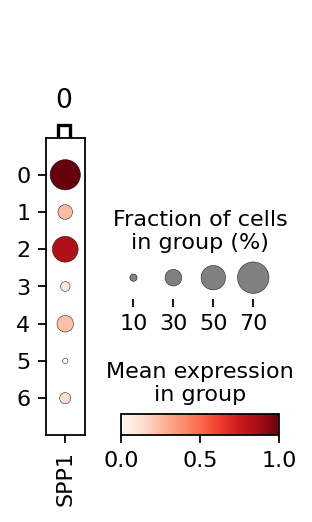

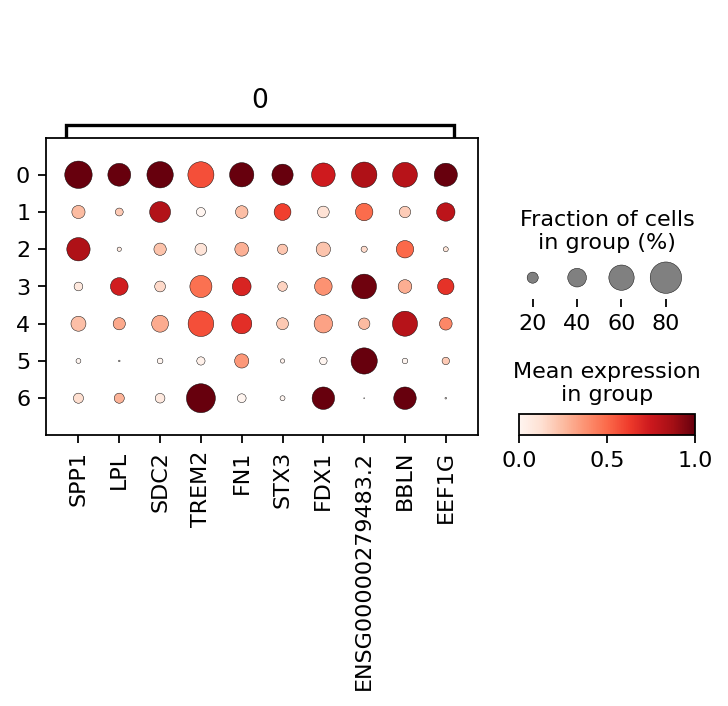

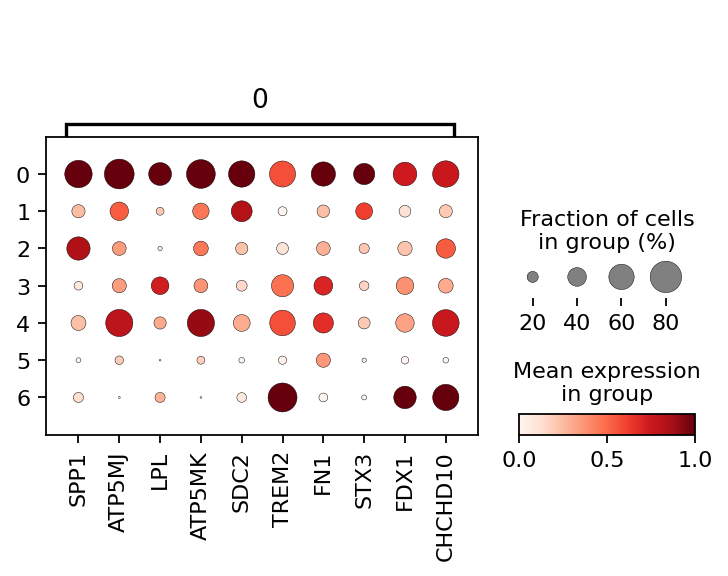

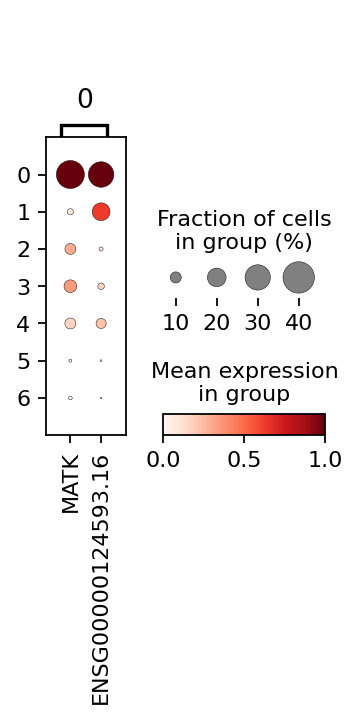

In [56]:
for minin, maxo in minmax:
    for i in axis_xs:
        sc.pl.rank_genes_groups_dotplot(
            adata_comb,
            groupby=i,
            groups=["0"],
            dendrogram=False,
            key="rank_genes_" + i + "_minin" + str(minin) + "_maxo" + str(maxo),
            n_genes=10,
            save="top-ranked_"
            + i
            + "_cluster0_minin"
            + str(minin)
            + "_maxo"
            + str(maxo)
            + ".png",
            standard_scale="var",
        )

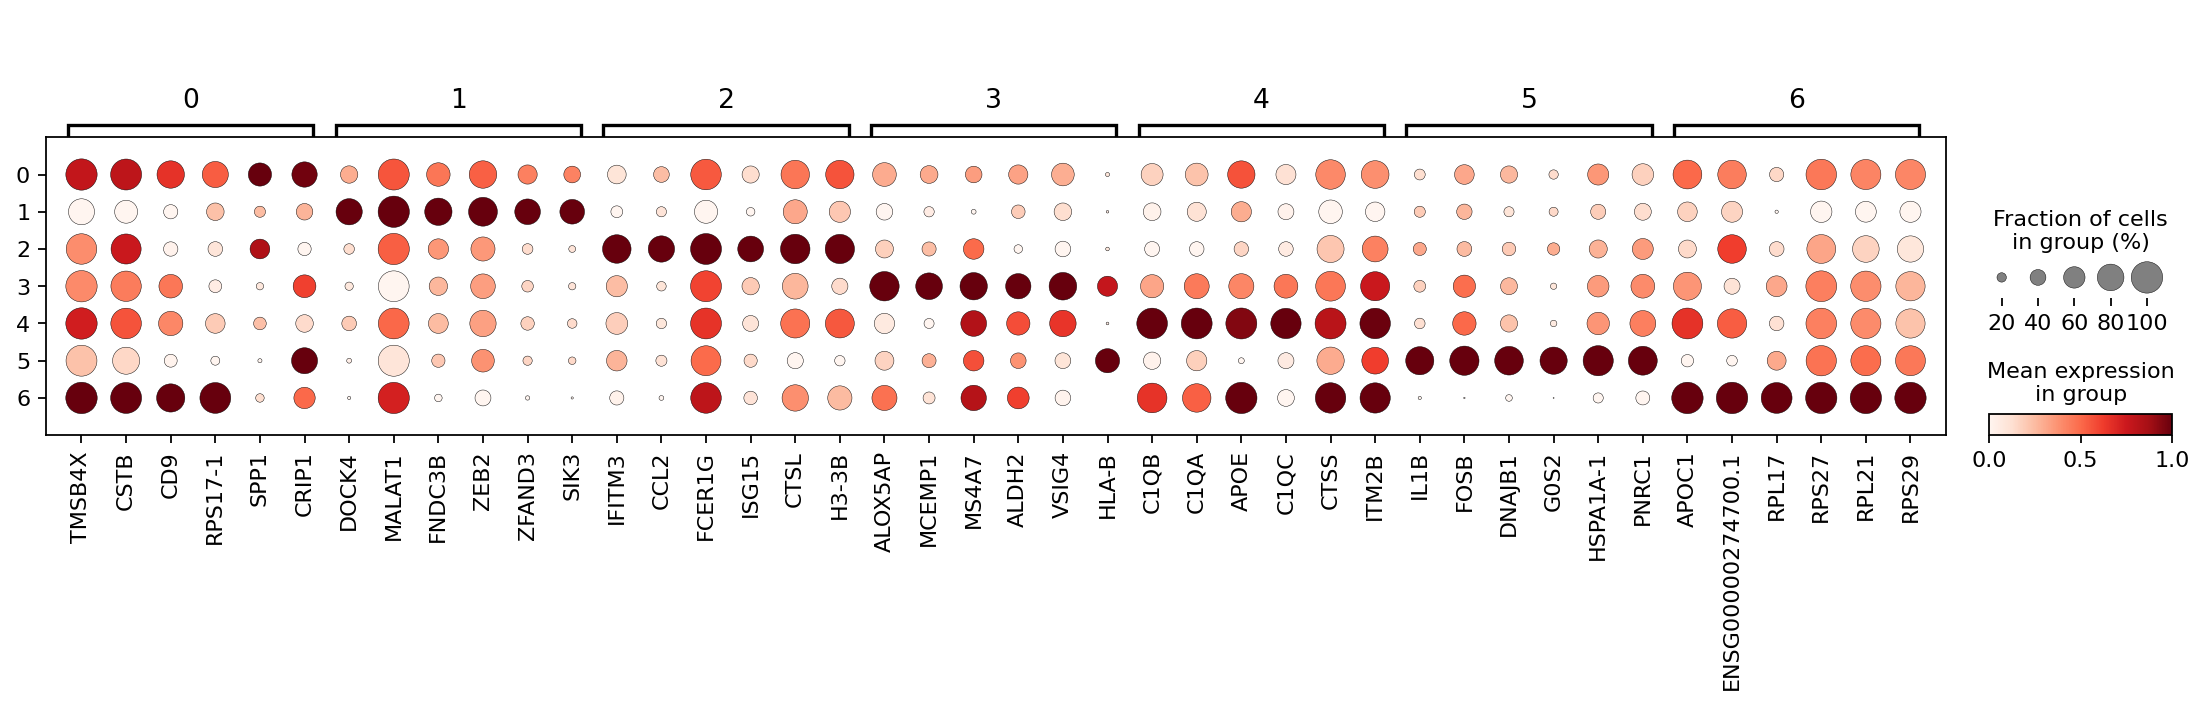

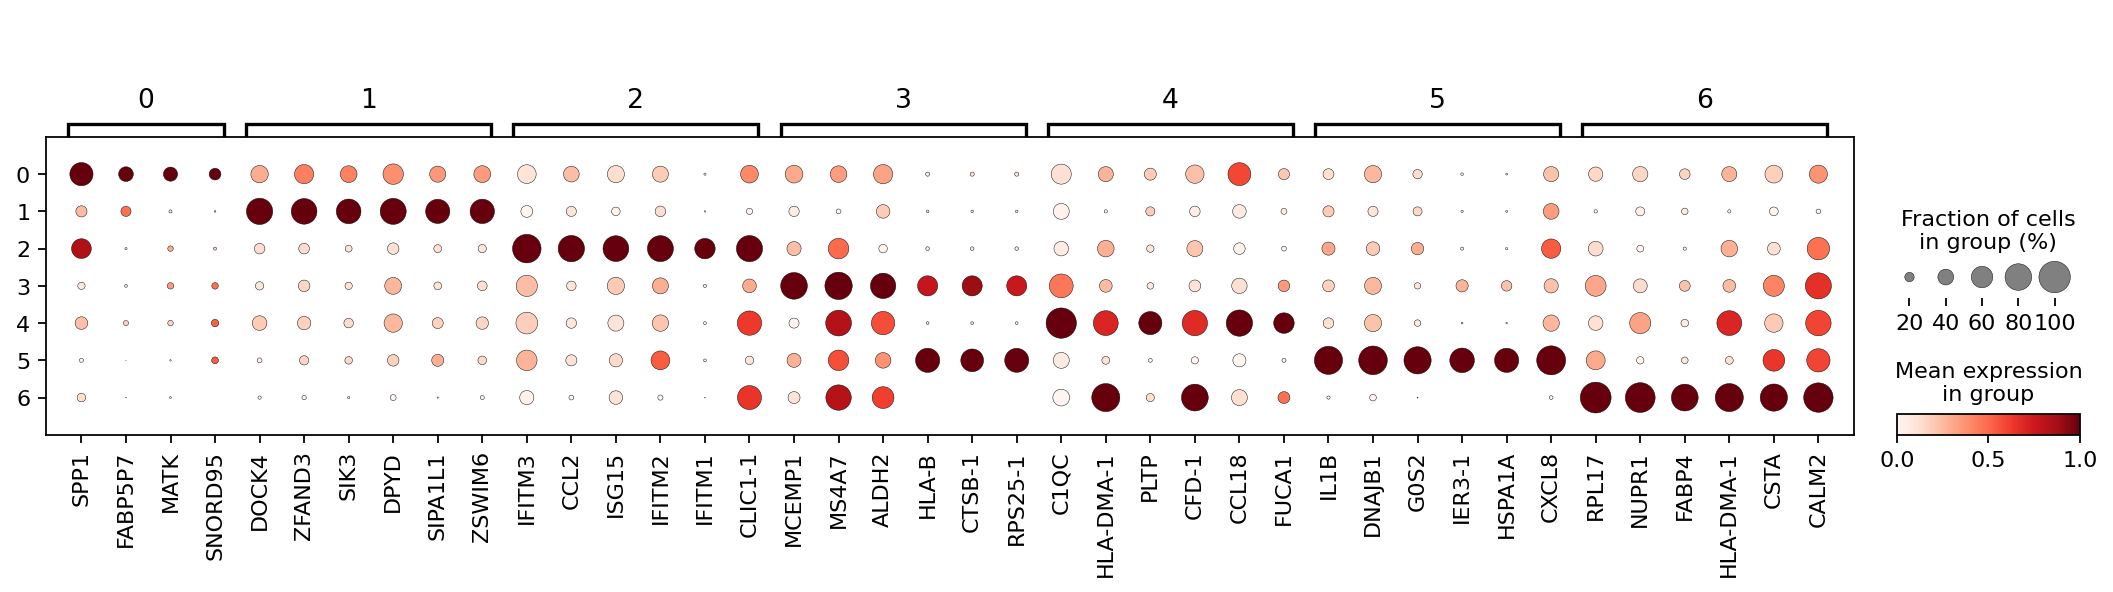

In [82]:
for i in axis_xs:
    sc.pl.rank_genes_groups_dotplot(
        adata_comb,
        groupby=i,
        dendrogram=False,
        key="rank_genes_" + i,
        n_genes=6,
        save="top-ranked_" + i + ".png",
        standard_scale="var",
    )
    sc.pl.rank_genes_groups_dotplot(
        adata_comb,
        groupby=i,
        dendrogram=False,
        key="rank_genes_" + i + "_fc2",
        n_genes=6,
        save="top-ranked_" + i + "_fc2.png",
        standard_scale="var",
    )

In [59]:
markers = ["SPP1", "TREM2", "FABP4", "CD163"]
# if use_full_matrix: if i in j
markers_temp = list(
    filter(
        re.compile("|".join(markers) + "$").match,
        adata_comb.var_names,
    )
)
markers = [j for i in markers for j in markers_temp if i == j]
markers

['SPP1', 'TREM2', 'FABP4', 'CD163']

In [108]:
markers_sasha = [
    "SPP1",  # shared with 2
    "PLA2G7",  # shared with 4
    "MMP9",  # shared with cluster 5
    # "EMP1", # ; causal role of EMP1 in PF has not been shown
    "CHI3L1",  # shared with 4 and 6
    # "CHIT1", # shared with 4 and 6, largerly from Eils_2020
]
markers_temp = markers_sasha + [
    # "MMP1",  # ; in IPF and NSCLC (https://bmccancer.biomedcentral.com/articles/10.1186/s12885-020-07494-w)
    # "FABP5P7", # coming from Kaminski_2020
    "MATK",  # ; part of a module (though barely 0.3-0.) associated to IPF prognosis along with SPP1 and CCL2 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9413564/)
    "SNORD95",  # coming largerly from 6/~29 studies; used for qPCR data normalization (https://www.spandidos-publications.com/10.3892/ol.2017.5816, https://faseb.onlinelibrary.wiley.com/doi/pdf/10.1096/fj.201700097r)
    "LPL",  # shared with 3; role in liver fibrosis exacerbation in mice (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6671781/), loss in macrophage LPL exacerbates adipose tissue fibrosis in obese mice
    "SDC2",  # shared with cluster 1; protection from pulmonary fibrosis, increased in alveolar macrophages from patients with IPF (https://www.nature.com/articles/s41598-022-06678-7)
    "FN1",  # shared with 3 and 4; expressed in alveolar fibroblasts expressing pathologic ECM (https://www.nature.com/articles/s41467-020-15647-5), critical for liver fibrogenesis (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5042748/)
    "CCL4",
    # "CTHRC1", # from alveolar fibroblasts
    "EEF1G",  # shared with 1, coming largerly from Kaminski_2020, Tata_unpubl, Meyer_2021, and Banovich_Kropski_2020; EEF1G interacts with keratins (fibrous), implicated as an intermediate (direct interaction) with NHLRC2 in Fibrosis, neurodegeneration and cerebral angiomatosis (FINCA) disease (https://academic.oup.com/hmg/article/27/24/4288/5102903)
    # "STX3", # shared with 1, coming from Kaminski_2020
    # "TREM2", # shared with 3, 4, and 6
    # "FDX1", # shared with 6
    # "BBLN", # shared with 4 and 6
    # "ATP5MJ", # shared with 4
    # "ATP5MK", # shared with 4
    # "FDX1", # shared with 6
    # "CHCHD10", # shared with 4 and 6
]

In [56]:
markers_temp = ["CCR5", "CD84", "FAM20C", "FNIP2", "LGMN", "SPP1"]
markers_temp = [
    "SPP1",
    "CD163",
    "LGMN",
    "INHBA",
    "FCN1",
    "CD14",
    "FCGR3A",
    "S100A8",
    "S100A12",
    "IL1B",
    "IL6",
    "CXCL8",
    "CCR2",
    "CCL2",
    "TGFB1",
    "MKI67",
]
markers_temp = [
    "FABP4",
    "MRC1",
    "MSR1",
    "C1QA",
    "C1QC",
    "SPP1",
    "SELENOP",  # SEPP1
    "CCL13",
    "F13A1",
    "FCN1",
    "S100A12",
]
set(markers_temp) - set(adata_comb.var_names)

set()

In [57]:
# markers_temp = list(set(markers_temp))
"-".join(markers_temp)

'FABP4-MRC1-MSR1-C1QA-C1QC-SPP1-SELENOP-CCL13-F13A1-FCN1-S100A12'

Saving to: figures/multi-disease_MdM_full/dotplot_selected-leiden_0.3_merged1_condition_study_FABP4-MRC1-MSR1-C1QA-C1QC-SPP1-SELENOP-CCL13-F13A1-FCN1-S100A12.png
Saving to: figures/multi-disease_MdM_full/dotplot_selected-leiden_0.3_merged1_FABP4-MRC1-MSR1-C1QA-C1QC-SPP1-SELENOP-CCL13-F13A1-FCN1-S100A12.png
Saving to: figures/multi-disease_MdM_full/dotplot_selected-leiden_0.3_FABP4-MRC1-MSR1-C1QA-C1QC-SPP1-SELENOP-CCL13-F13A1-FCN1-S100A12.png
Saving to: figures/multi-disease_MdM_full/dotplot_selected-leiden_0.3_merged1_study_FABP4-MRC1-MSR1-C1QA-C1QC-SPP1-SELENOP-CCL13-F13A1-FCN1-S100A12.png
Saving to: figures/multi-disease_MdM_full/dotplot_selected-leiden_0.3_merged1_condition_FABP4-MRC1-MSR1-C1QA-C1QC-SPP1-SELENOP-CCL13-F13A1-FCN1-S100A12.png


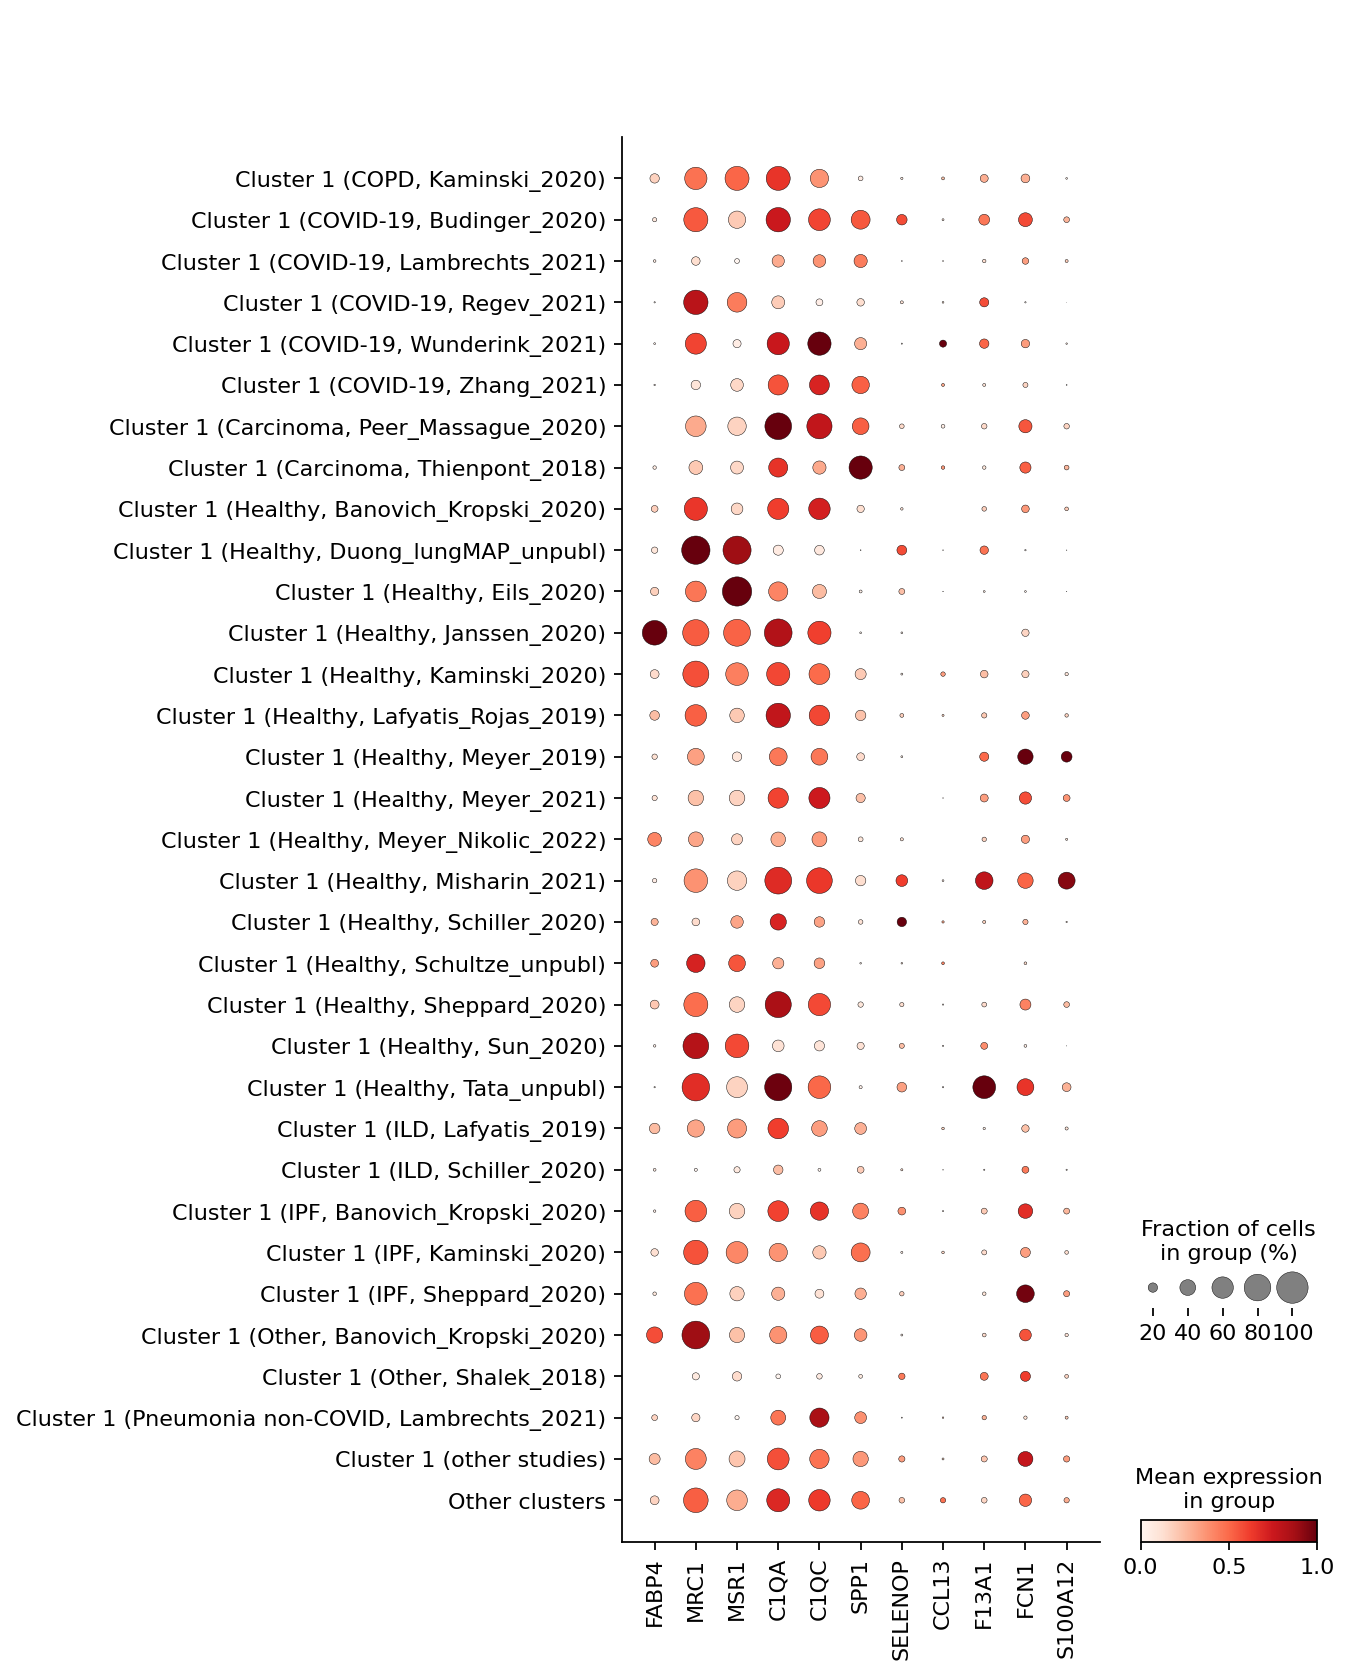

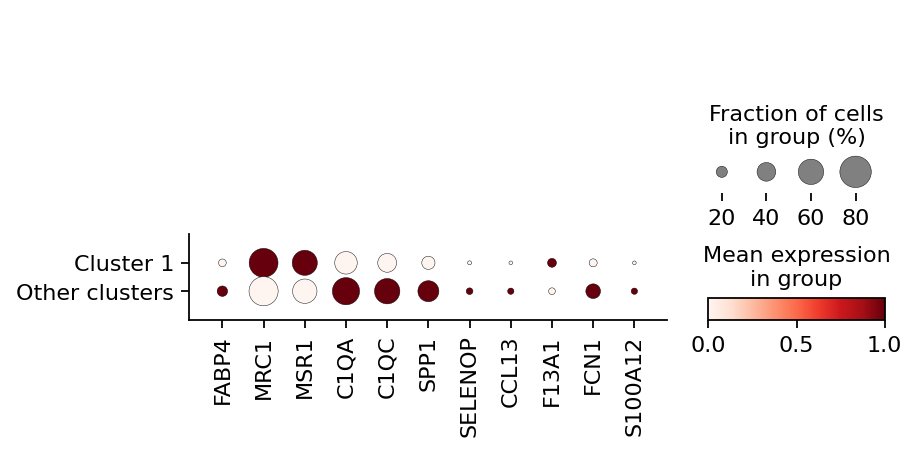

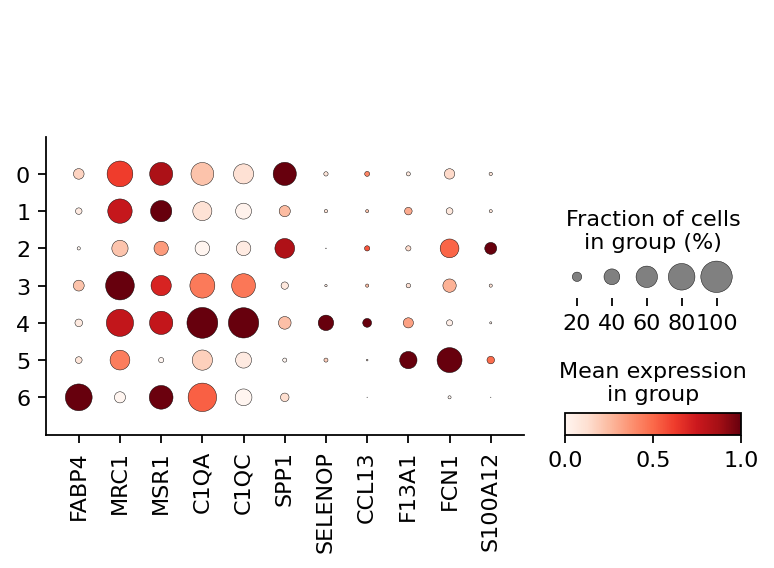

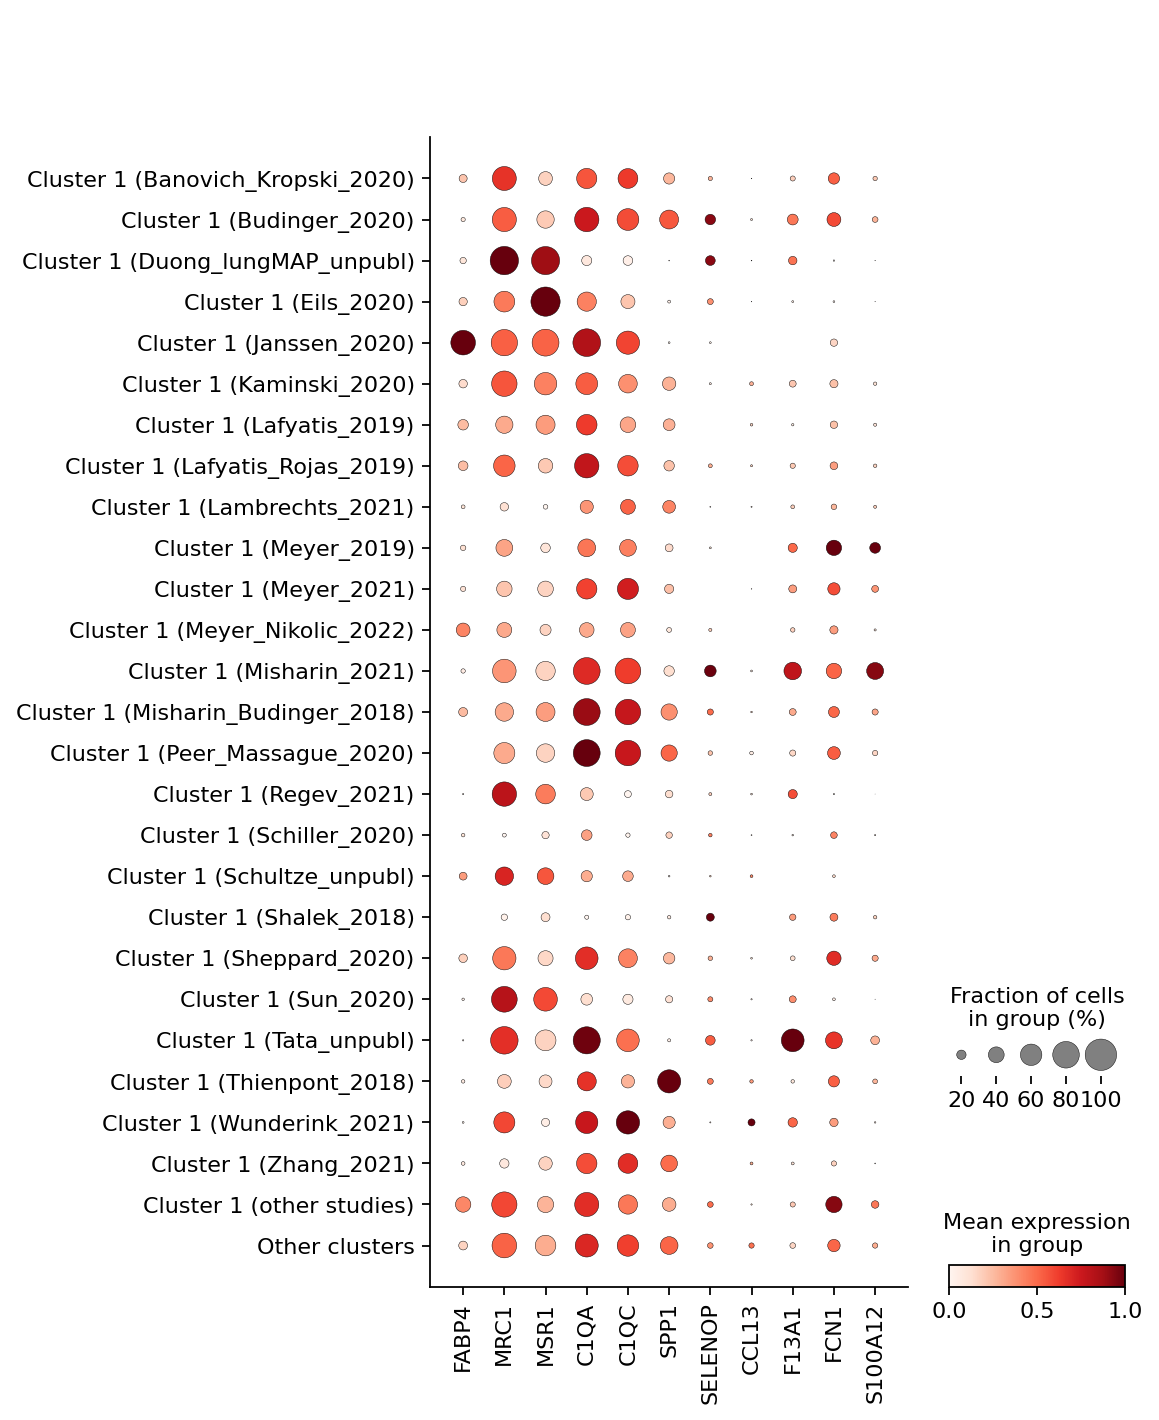

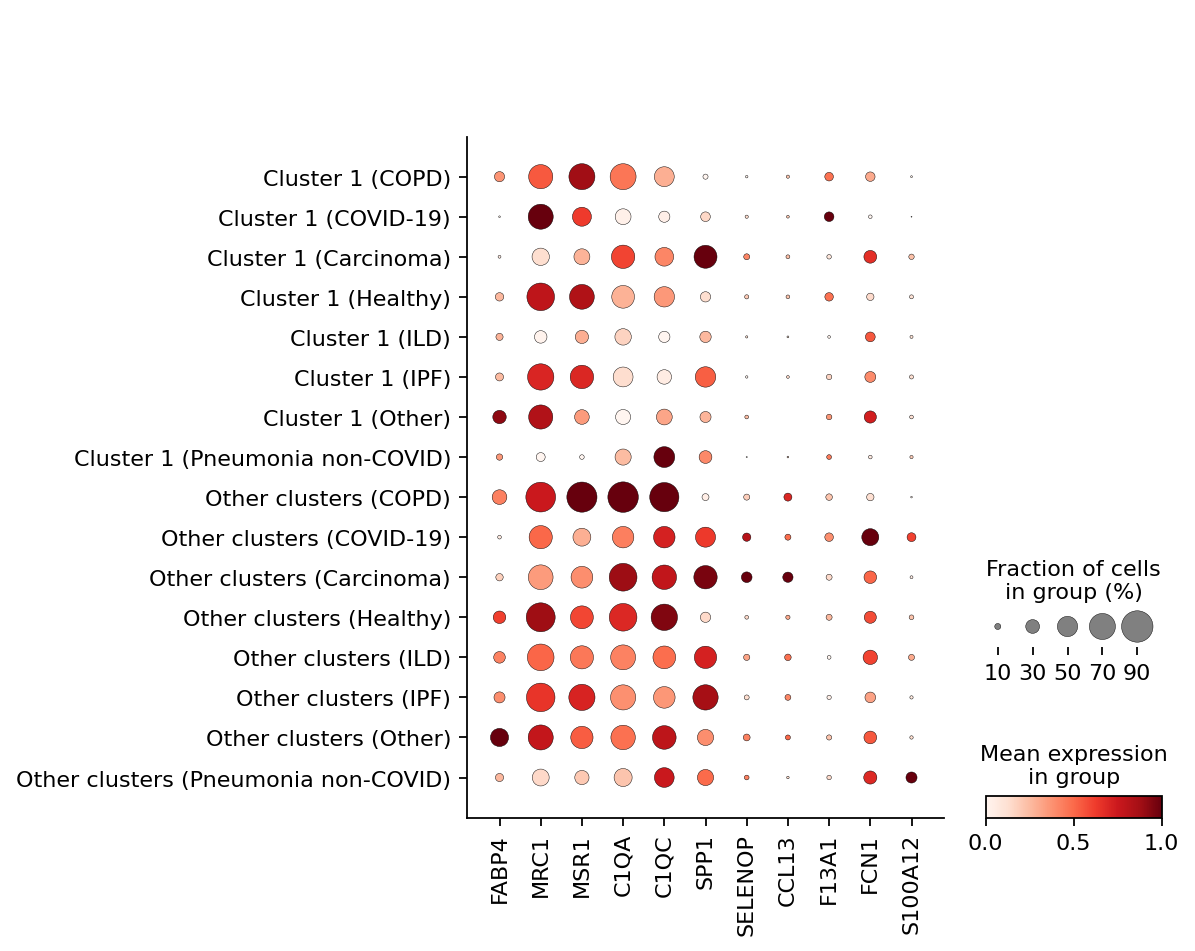

In [70]:
i = "leiden_0.3"
dotplots_dict = {}
columns2plot = [
    i + mtype + "_condition_study",
    i + mtype,
    i,
    i + mtype + "_study",
    i + mtype + "_condition",
]
for c2plot in columns2plot:
    fname_file = (
        str(sc.settings.figdir)
        + "/dotplot_selected-"
        + c2plot
        + "_"
        + "-".join(markers_temp)
        + ".png"
    )
    dotplots_dict[fname_file] = sc.pl.dotplot(
        adata_comb,
        markers_temp,
        groupby=c2plot,
        standard_scale="var",
        # save=temp,
        return_fig=True,
    )
    print(f"Saving to: {fname_file}")
    dotplots_dict[fname_file].savefig(
        filename=fname_file,
        bbox_inches="tight",
        transparent=True,
    )

### Conclusions <a class="anchor" id="bullet5"></a>

### Save <a class="anchor" id="bullet6"></a>

Done.